<a href="https://colab.research.google.com/github/AparnaRameshA95/ICTK_Internship/blob/main/Aparna_Ramesh_a_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Purchase Behavior Analysis and Loyalty Prediction**

### **Project Overview:**

This internship focuses on analyzing customer purchase behavior, satisfaction, and loyalty scores,
using the data to develop a predictive model. The final deliverable will be a Flask-based application
that predicts customer satisfaction or loyalty based on user inputs. This project offers hands-on
experience in data analysis, feature engineering, machine learning, and web application
development.

## **Dataset Description:**
The dataset includes fields such as:

* **Age:** Age of the customer
* **Items Purchased:** Number of items purchased in a single transaction
* **Total Spent:** Total amount spent on the transaction
* **Discount (%):** Percentage discount on the purchase
* **Satisfaction Score:** Self-reported customer satisfaction score
* **Warranty Extension:** Whether the customer opted for warranty extension
* **Gender:** Gender of the customer
* **Region:** Customer's region
* **Product Category:** Category of the purchased product
* **Payment Method:** Payment method used (e.g., UPI, Cash)
* **Revenue:** Total revenue from the customer
* **Store Rating:** Rating given by the customer to the store
* **Loyalty Score:** Customer's loyalty score
* **Membership Status:** Whether the customer is a member
* **Preferred Visit Time:** Preferred time of visit

## **1. Data Loading and Inspection:**

### **1.1 Importing Libraries**

In [100]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **1.2 Load the Dataset**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Load the uploaded CSV file to examine its structure and contents
file_path = '/content/drive/MyDrive/Internship_ICTK/Electronic - Electronic.csv'
df = pd.read_csv(file_path)

### **1.3 Understanding the Structure**

### **1.3.1 View the First Few Rows**

In [103]:
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the first few rows and basic information about the dataset
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


### **1.3.2 Shape of the Data**

In [104]:
df.shape
print("There are "+ str(df.shape[0]) +" observations and "+ str(df.shape[1]) +" columns from the dataset.")

There are 5000 observations and 15 columns from the dataset.


The dataset contains 15 columns and 5,000 entries, covering various customer attributes and purchasing details, such as:

1. **Demographic:** Age, Gender, Region

2. **Purchasing Behavior:** Items Purchased, Total Spent, Discount (%)

3. **Customer Satisfaction & Loyalty:** Satisfaction Score, Loyalty Score, Store Rating

4. **Other Details:** Payment Method, Product Category, Preferred Visit Time

For building a predictive model, we could focus on predicting Customer Loyalty as the output.

### **1.4 View DataFrame Information**

In [105]:
# Display basic information about the dataset to assess data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

### **1.5 Understand data types**

In [106]:
# Examine data types of each column
for column in df.columns:
  print(f" {column}:- Data Type ({df[column].dtype})")

 Age:- Data Type (int64)
 Items Purchased:- Data Type (int64)
 Total Spent:- Data Type (float64)
 Discount (%):- Data Type (float64)
 Satisfaction Score:- Data Type (float64)
 Warranty Extension:- Data Type (int64)
 Gender:- Data Type (object)
 Region:- Data Type (object)
 Product Category:- Data Type (object)
 Payment Method:- Data Type (object)
 Revenue:- Data Type (float64)
 Store Rating:- Data Type (float64)
 Loyalty Score:- Data Type (float64)
 Membership Status:- Data Type (float64)
 Preferred Visit Time:- Data Type (object)


The dataset has 15 columns with the following data types:

* Integer (int64): Age, Items Purchased, Warranty Extension
* Float (float64): Total Spent, Discount (%), Satisfaction Score, Revenue, Store Rating, Loyalty Score, Membership Status
* Object (categorical or text data): Gender, Region, Product Category, Payment Method, Preferred Visit Time

Categorical Variables: Columns such as Gender, Region, Product Category, Payment Method, and Preferred Visit Time are stored as object types and may need to be encoded into numerical format (e.g., one-hot or label encoding) for modeling.

### **1.6 Summary Statistics**

In [107]:
# Display basic statistical summary
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


Here is the statistical summary of the dataset:

**Numeric Columns:**
1. Age:
   * Mean: 43.58 years
   * Range: 18 to 69 years
2. Items Purchased:
   * Mean: 7.54 items
   * Range: 1 to 14 items

3. Total Spent:
   * Mean: $243.72

   * Range: $  15.11 to  699.61

4. Discount (%):
   * Mean: 26.62%
   * Range: 5% to 48.49%
5. Satisfaction Score:
   * Mean: 2.65
   * Range: 1 to 5
6. Warranty Extension:
   * Mean: 0.22 (binary column: 0 or 1)
7. Revenue:
   * Mean: $717.99

   * Range: -$201.43 to 3523.47
8. Store Rating:
   * Mean: 3.98
   *Range: 3.08 to 4.76
9. Loyalty Score:
   * Mean: 15.64
   * Range: 0 to 39.24
10. Membership Status:
  * Mean: 0.31 (binary column: 0 or 1)

**Categorical Columns:**
1. Gender: 3 unique values, most frequent: Male (2,446 occurrences)
2. Region: 4 unique values, most frequent: South (1,310 occurrences)
3. Product Category: 5 unique values, most frequent: Accessories (1,015 occurrences)
4. Payment Method: 5 unique values, most frequent: Net Banking (1,038 occurrences)
5. Preferred Visit Time: 3 unique values, most frequent: Morning (1,672 occurrences)

## **2. Data Cleaning:**

### **2.1 Checking for Missing values**

In [108]:
# Check for any  missing values in the original dataset
missing_values_summary = df.isnull().sum()

# Display columns with missing values and their counts
missing_values_summary[missing_values_summary > 0]


,0
Gender,2
Payment Method,4
Store Rating,3
Membership Status,6
Preferred Visit Time,8



### **2.2 Handling missing values**

* For the Store Rating variable, using mean imputation is a reasonable approach due to the likely symmetric distribution. This could be supported by checking the summary statistics (mean and median).
* The Membership Status column might be numerical or ordinal (representing levels of membership). Using the median for imputation is robust to outliers and is suitable for skewed distributions.
* The columns Gender, Payment Method, and Preferred Visit Time are categorical variables. Using the mode (most frequent value) for imputation is a common practice for categorical data as it maintains the most frequent category within the dataset.

In [109]:
df_cleaned=df.copy()
# Handling missing values
# Fill 'Store Rating' with the mean
df_cleaned['Store Rating'] = df_cleaned['Store Rating'].fillna(df_cleaned['Store Rating'].mean())

# Fill 'Membership Status' with the median
df_cleaned['Membership Status'] = df_cleaned['Membership Status'].fillna(df_cleaned['Membership Status'].median())

# Fill 'Gender', 'Payment Method', 'Preferred Visit Time' with the mode
for column in ['Gender', 'Payment Method', 'Preferred Visit Time']:
  df_cleaned[column] =df_cleaned[column].fillna(df_cleaned[column].mode()[0])

In [110]:
# Check for any remaining missing values in the dataset after null value handling
missing_values_summary = df_cleaned.isnull().sum()

# Display columns with missing values and their counts
missing_values_summary[missing_values_summary > 0]

,0


### **2.3 Checking for Duplicates**

In [111]:
#Checking for Duplicates
print("Number of Duplicates:",df.duplicated().sum())

Number of Duplicates: 0


### **2.4 Checking for Garbage Values**

Some columns like Gender, Region, Payment Method, and Preferred Visit Time may have unexpected or inconsistent values (e.g., typos, invalid entries). We should inspect these columns further for anomalies.

In [112]:
# Check for unique values in columns that might contain garbage or inconsistent data
columns_to_check = ['Gender', 'Region', 'Product Category', 'Payment Method', 'Preferred Visit Time']

# Extracting unique values for inspection
unique_values = {col: df[col].unique() for col in columns_to_check}
unique_values


{'Gender': array(['Male', 'Female', 'Other', nan], dtype=object),
 'Region': array(['South', 'East', 'North', 'West'], dtype=object),
 'Product Category': array(['Accessories', 'Laptop', 'Tablet', 'Television', 'Mobile'],
       dtype=object),
 'Payment Method': array(['UPI', 'Cash', 'Credit Card', 'Net Banking', 'Debit Card', nan],
       dtype=object),
 'Preferred Visit Time': array(['Evening', 'Morning', 'Afternoon', nan], dtype=object)}

No clear garbage values were detected in the categorical fields, but some columns (e.g., Gender, Payment Method, Preferred Visit Time) contain missing values (NaN).

### **2.5 Datatype conversion**

**1. Columns Needing Conversion to int64:**
* **Satisfaction Score:** Currently float64, but satisfaction scores are discrete and can be integers.
* **Store Rating:** Currently float64, but ratings are often represented as integers (e.g., 1 to 5).
* **Loyalty Score:** Currently float64, but loyalty points are discrete and can be integers.

**2. Why Convert These Columns?**
* **Memory Optimization:** Integer data types (int64) consume less memory than floating-point types (float64).
* **Consistency**: Ensures that scores and ratings, which are inherently discrete, are represented as integers.
* **Preprocessing:** Models or analyses might require integer inputs for these fields.

In [113]:
# Convert the specified columns to int64
columns_to_convert = ['Store Rating', 'Satisfaction Score', 'Loyalty Score']
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype('int64')

# Verify the changes
df_cleaned.dtypes[columns_to_convert]

,0
Store Rating,int64
Satisfaction Score,int64
Loyalty Score,int64


## **3. Transforming a Regression Problem into a Classification Problem**

### **3.1 Analyzing the Proportion of Unique Values**

In [114]:
# Calculate UVP for the 'Loyalty Score'(Target)
unique_count = df_cleaned['Loyalty Score'].nunique()
total_count = df_cleaned['Loyalty Score'].count()
uvp = (unique_count / total_count)
print(f"UVP of 'loyalty_score': {uvp:.3f}")

UVP of 'loyalty_score': 0.008


Based on the Unique Value Proportions (UVP), we can determine whether a column is better suited for classification or regression:

* **UVP Explanation:**
    * UVP measures the proportion of unique values in a column relative to the total number of entries.
    * A lower UVP (close to 0) often indicates categorical or discrete data, which is typically used for classification tasks.
    * A higher UVP (closer to 1) suggests continuous data, which is more suitable for regression tasks.

**UVP for Loyalty Score: 0.008**
* **Analysis:**
  * This is a low UVP, indicating there are relatively few unique values compared to the total entries.
  * This suggests that Loyalty Score is more likely to represent discrete categories rather than a continuous range.
* **Recommendation:**
  * Treat Loyalty Score as a classification problem if:
     * It has well-defined discrete categories (e.g., loyalty tiers: 'Low', 'Medium', 'High').
     * The goal is to predict membership in a specific group.
  * Treat it as a regression problem if:
     * The values represent a continuous scale (e.g., 0–100 loyalty points) and the objective is to predict an exact numerical value.

### **3.2 Strategic Categorization of the Target Variable**

In the case of converting a regression problem to a classification problem, target binning is typically done before conducting detailed **EDA** (Exploratory Data Analysis) because you need to transform the target variable into categorical classes for classification purposes.

**Steps for Converting Regression to Classification:**

1. Binning the Target Variable (Before Detailed EDA):
   * In a regression-to-classification problem, the first step is to bin the continuous target variable into discrete classes (e.g., 'Low', 'Medium', 'High'). This transformation is necessary because classification models require a categorical target variable.
   * Custom binning: Based on specific thresholds.
2. After binning the target, proceed with EDA to understand the distribution of the binned target variable.

In [115]:
# Categorizing 'Loyalty Score' into "Low", "Medium", "High"
loyalty_bins = [0, 10, 20, df_cleaned['Loyalty Score'].max()]
loyalty_labels = ['Low', 'Medium', 'High']
# Create a new categorical feature based on the bins
df_cleaned['Loyalty Category'] = pd.cut(df_cleaned['Loyalty Score'], bins=loyalty_bins, labels=loyalty_labels, right=True, include_lowest=True) # Define the bins and labels to include zero

In [116]:
# Display Loyalty Score and Loyalty Category for each customer
for index, row in df_cleaned.iterrows():
  print(f"Customer {index + 1}:")
  print(f"  Loyalty Score: {row['Loyalty Score']}")
  print(f"  Loyalty Category: {row['Loyalty Category']}")
  print("-" * 20)

Streaming output truncated to the last 5000 lines.
Customer 3751:
  Loyalty Score: 24
  Loyalty Category: High
--------------------
Customer 3752:
  Loyalty Score: 8
  Loyalty Category: Low
--------------------
Customer 3753:
  Loyalty Score: 2
  Loyalty Category: Low
--------------------
Customer 3754:
  Loyalty Score: 23
  Loyalty Category: High
--------------------
Customer 3755:
  Loyalty Score: 8
  Loyalty Category: Low
--------------------
Customer 3756:
  Loyalty Score: 18
  Loyalty Category: Medium
--------------------
Customer 3757:
  Loyalty Score: 9
  Loyalty Category: Low
--------------------
Customer 3758:
  Loyalty Score: 17
  Loyalty Category: Medium
--------------------
Customer 3759:
  Loyalty Score: 4
  Loyalty Category: Low
--------------------
Customer 3760:
  Loyalty Score: 7
  Loyalty Category: Low
--------------------
Customer 3761:
  Loyalty Score: 27
  Loyalty Category: High
--------------------
Customer 3762:
  Loyalty Score: 19
  Loyalty Category: Medium
----

In [117]:
df_cleaned['Loyalty Category'].value_counts()

,count
Loyalty Category,
Low,1981
High,1550
Medium,1469


## **4. Exploratory Data Analysis (EDA):**

**Exploratory Data Analysis (EDA)** is a crucial step in the data science pipeline. It involves understanding the data, its characteristics, and potential relationships between independent and dependent variables.

### **4.1 Age**

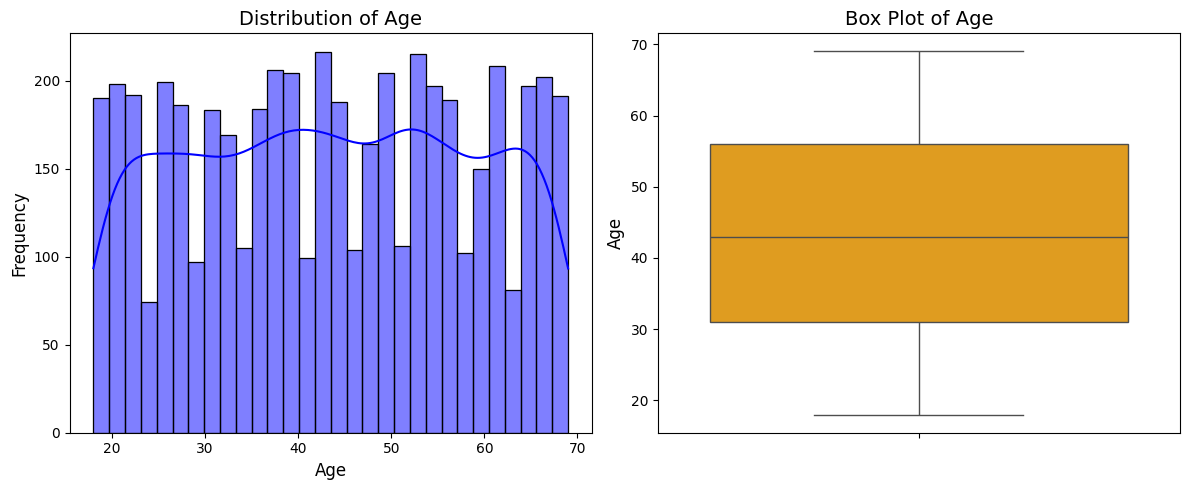

Summary Statistics for 'Age':
 count    5000.000000
mean       43.584600
std        14.919094
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


In [118]:
# 1. Summary Statistics
stats = df_cleaned['Age'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Age'], color='orange')
plt.title('Box Plot of Age', fontsize=14)
plt.ylabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Age':\n", stats)

**Key Points from the Age distribution:**

* Two distinct age groups are more common.
* The age distribution appears to be slightly right-skewed, with most values concentrated between 30 and 60.
There are no extreme outliers, as the range (18–69) seems reasonable.
* Ages range from 18 to 69, with fewer very young or very old individuals.
* The bimodal nature suggests potential age-based customer segments.

### **4.1.1 How Age Impact Loyalty Category**

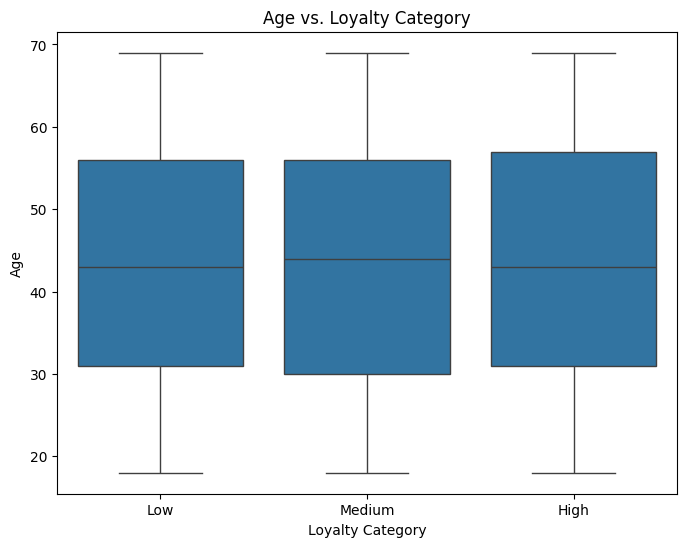

In [119]:
# Bivariate analysis of age vs loyalty category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Age', data=df_cleaned)
plt.title('Age vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Age')
plt.show()

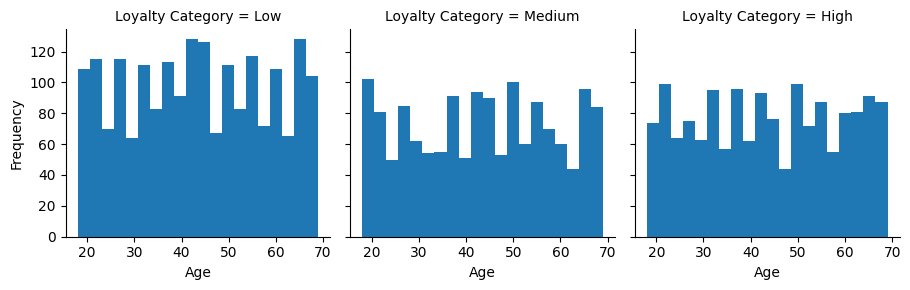

In [120]:
# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Age', bins=20)
g.set_axis_labels('Age', 'Frequency')
plt.show()

Key Takeways
* The similarity in the overall shape of the distributions across the three categories suggests that age might not be a strong determinant of loyalty on its own.
* However, the slight differences in the distributions could indicate that certain age groups might be more likely to fall into specific loyalty categories. For example, the higher proportion of older customers in the high loyalty category could suggest that older customers are more likely to be loyal to the brand.

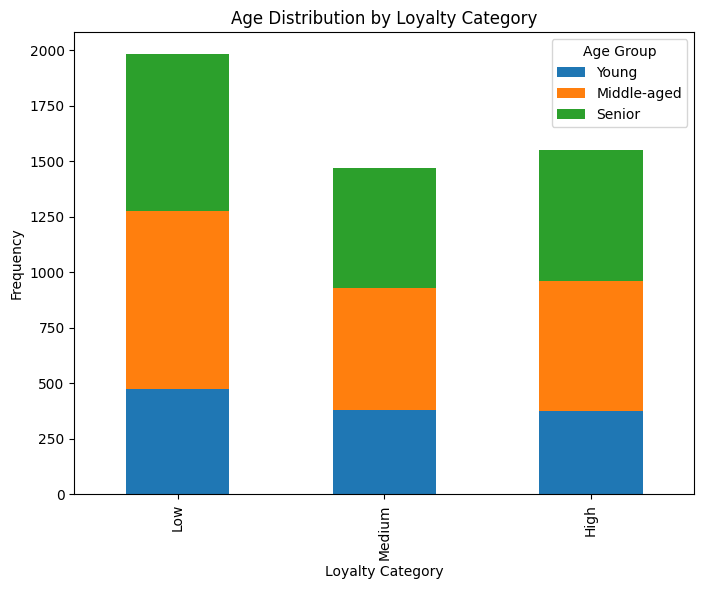

In [121]:
# Create age bins (example)
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Create a cross-tabulation table
age_loyalty_table = pd.crosstab(df_cleaned['Loyalty Category'], df_cleaned['Age Group'])

# Plot the stacked bar chart
age_loyalty_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Age Distribution by Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()

### **4.2 Items Purchased**

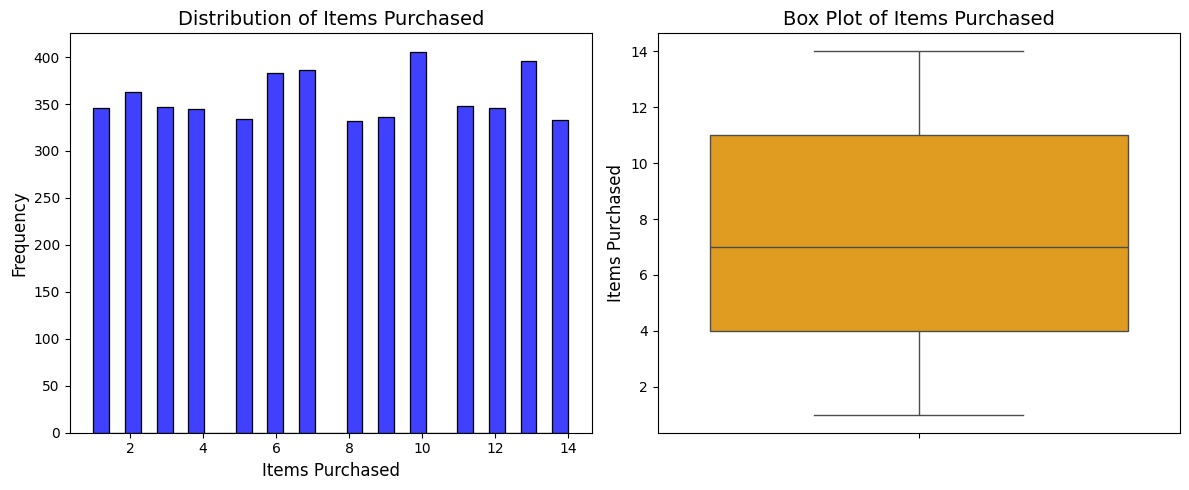

Summary Statistics for 'Items Purchased':
 count    5000.000000
mean        7.536600
std         4.014858
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: Items Purchased, dtype: float64


In [122]:
# 1. Summary Statistics
stats = df_cleaned['Items Purchased'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Items Purchased'].dropna(), bins=30, color='blue')
plt.title('Distribution of Items Purchased', fontsize=14)
plt.xlabel('Items Purchased', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Items Purchased'], color='orange')
plt.title('Box Plot of Items Purchased', fontsize=14)
plt.ylabel('Items Purchased', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Items Purchased':\n", stats)

**Key Observations:**
* The histogram reveals a slightly right-skewed distribution, with a longer tail towards the right. This means there are more transactions with a smaller number of items purchased compared to those with a larger number.
* The most frequent purchase quantity falls within the range of 6-8 items, as indicated by the peak of the histogram.
* The box plot shows the presence of some outliers on the higher end of the "Items Purchased" range, beyond the upper whisker.

### **4.2.1 How Item Purchased Impact Loyalty Category**

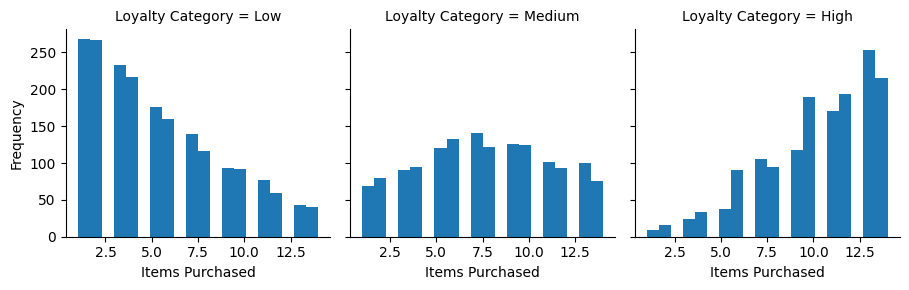

In [123]:
# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Items Purchased', bins=20)
g.set_axis_labels('Items Purchased', 'Frequency')
plt.show()

Key Takeways
 * The distributions are similar in shape across all categories.
 * The median number of items purchased seems slightly higher for the High Loyalty category, although there's some overlap with other categories.
 * There's a slight difference in the variability of item purchases across the loyalty categories.

### **4.3 Total Spent**

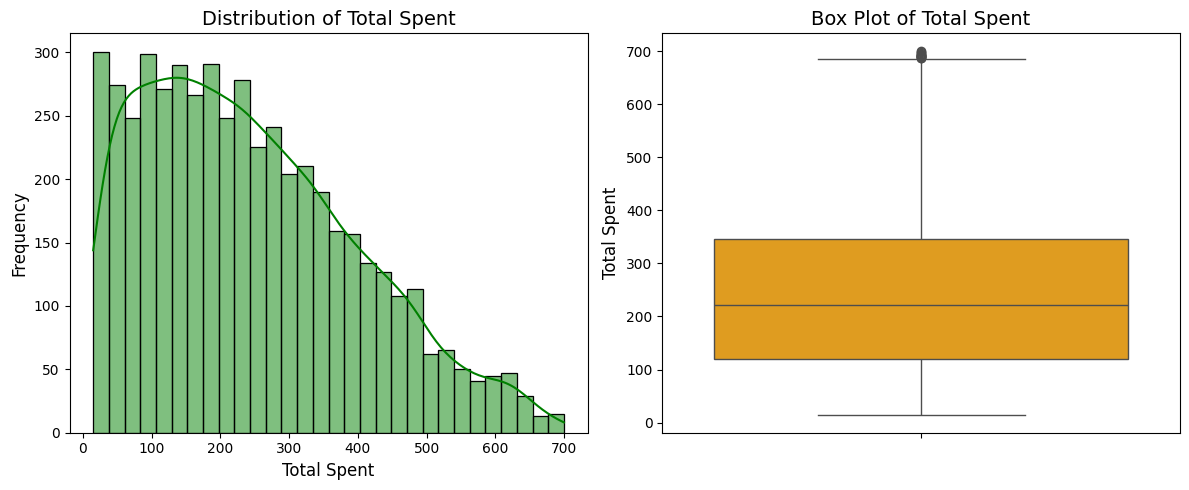

Summary Statistics for 'Total Spent':
 count    5000.000000
mean      243.721837
std       154.949018
min        15.105730
25%       119.130074
50%       221.514206
75%       346.173367
max       699.611576
Name: Total Spent, dtype: float64


In [124]:
# 1. Summary Statistics
stats = df_cleaned['Total Spent'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Total Spent'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Total Spent', fontsize=14)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Total Spent'], color='orange')
plt.title('Box Plot of Total Spent', fontsize=14)
plt.ylabel('Total Spent', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Total Spent':\n", stats)

**Observations:**
* The distribution of "Total Spent" is right-skewed, meaning there are more transactions with lower spending amounts and a few transactions with significantly higher spending amounts.
* The majority of customers tend to spend a relatively smaller amount, while a few customers make larger purchases.
* The box plot shows the presence of outliers on the higher end of the "Total Spent" range. These outliers represent customers who spent significantly more than the typical customer, potentially indicating bulk purchases or high-value customers.

### **4.3.1 How Total Spent Impact on Loyalty Category**

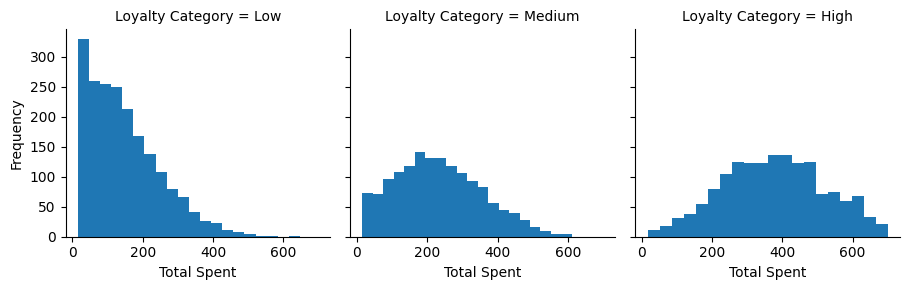

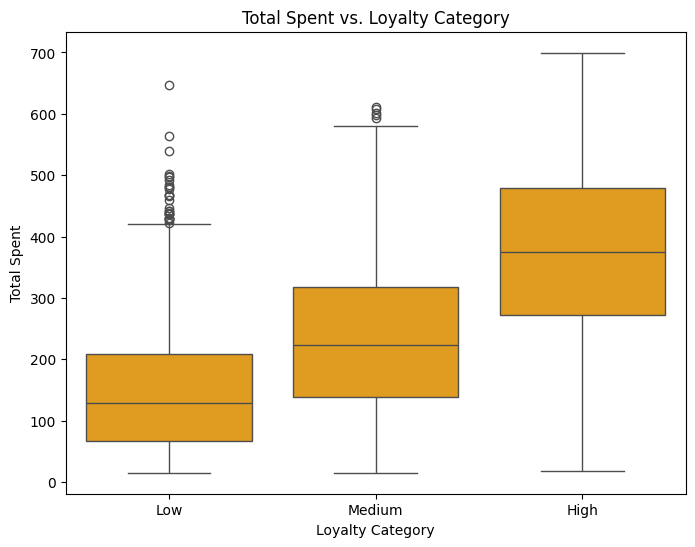

In [125]:
# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Total Spent', bins=20)
g.set_axis_labels('Total Spent', 'Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Total Spent', data=df_cleaned,color='orange')
plt.title('Total Spent vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Total Spent')
plt.show()

### **4.4 Discount (%)**

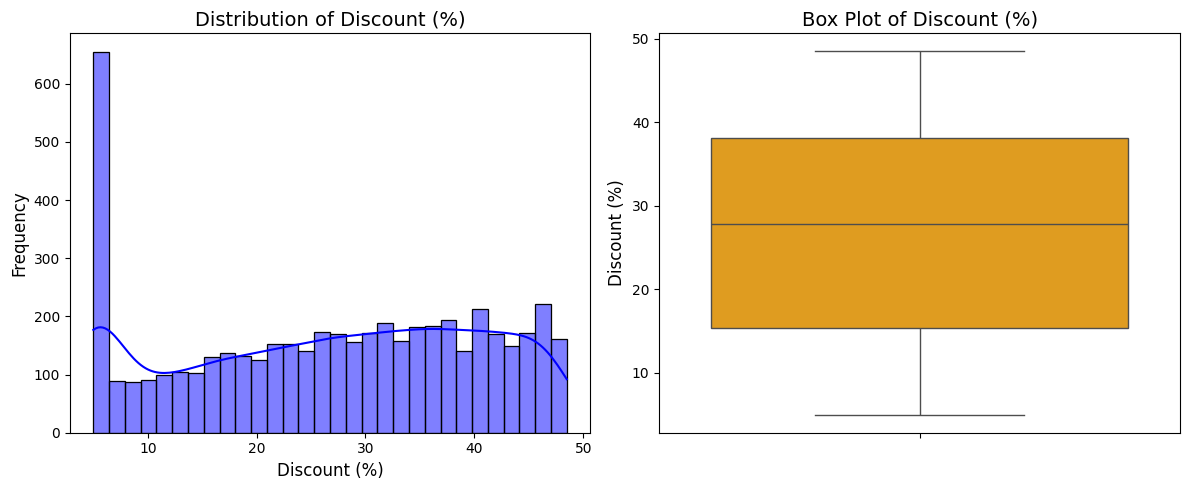

Summary Statistics for 'Discount (%)':
 count    5000.000000
mean       26.622330
std        13.586725
min         5.000000
25%        15.382663
50%        27.848579
75%        38.086993
max        48.489427
Name: Discount (%), dtype: float64


In [126]:
# 1. Summary Statistics
stats = df_cleaned['Discount (%)'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Discount (%)'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Discount (%)', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Discount (%)'], color='orange')
plt.title('Box Plot of Discount (%)', fontsize=14)
plt.ylabel('Discount (%)', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Discount (%)':\n", stats)

**Interpretation:**
* The average discount offered is around 26.62%, indicating a fairly generous discount strategy. The median discount is likely close to the mean, suggesting a relatively symmetric distribution.
* The standard deviation and interquartile range provide insights into how much the discounts vary. A higher standard deviation would suggest a wider range of discounts offered.
* The histogram likely reveals the shape of the discount distribution. It might be slightly skewed or have multiple peaks. Multiple peaks might indicate specific discount levels that are commonly used.
* The box plot helps identify any unusually high or low discounts (outliers). These outliers could represent special promotions, clearance sales, or data errors.


### **4.4.1 How Discount Impact on Loyalty Score**

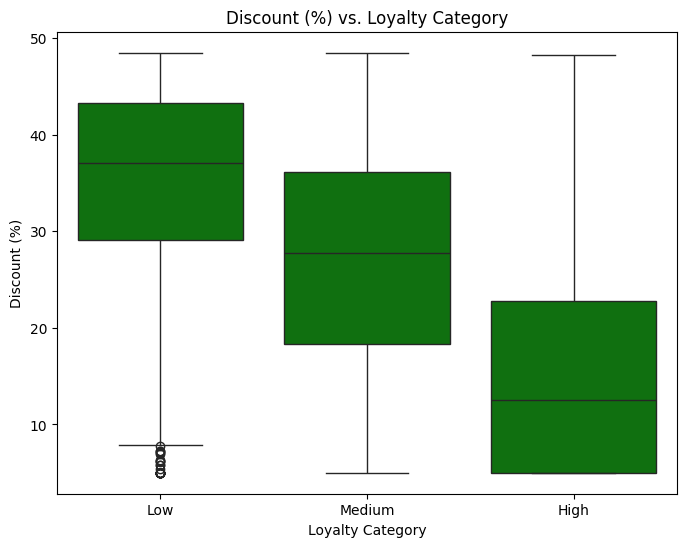

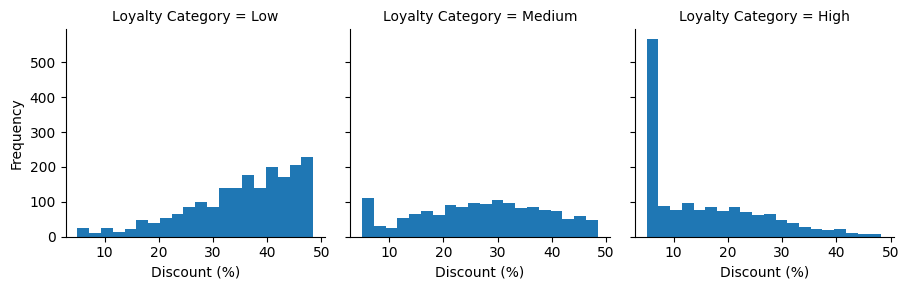

In [127]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Discount (%)', data=df_cleaned, color='green')
plt.title('Discount (%) vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Discount (%)')
plt.show()

# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Discount (%)', bins=20)
g.set_axis_labels('Discount (%)', 'Frequency')
plt.show()

### **4.5 Satisfaction Score**

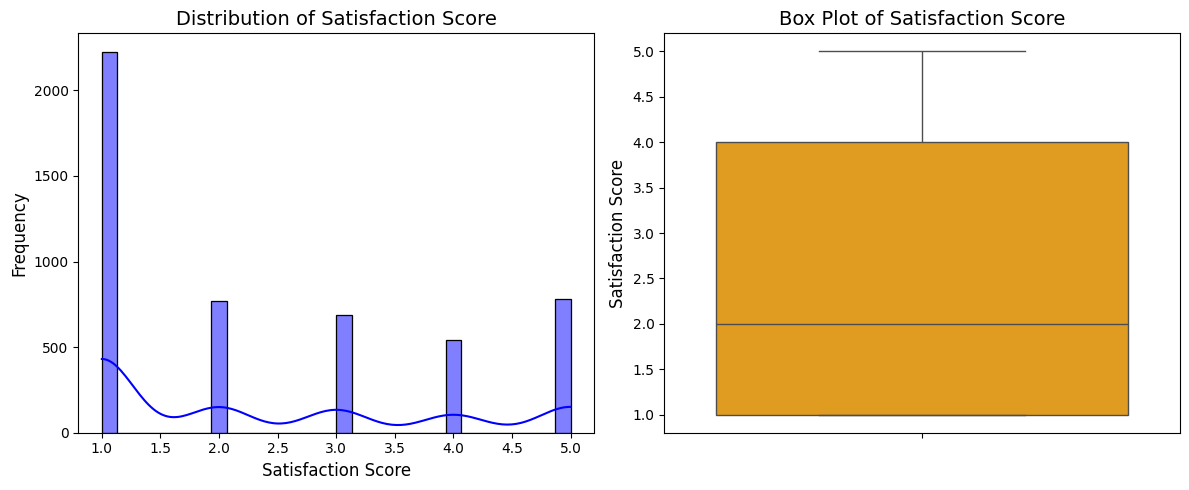

Summary Statistics for 'Satisfaction Score':
 count    5000.000000
mean        2.376800
std         1.508269
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Satisfaction Score, dtype: float64


In [128]:
# 1. Summary Statistics
stats = df_cleaned['Satisfaction Score'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Satisfaction Score'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Satisfaction Score', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Satisfaction Score'], color='orange')
plt.title('Box Plot of Satisfaction Score', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Satisfaction Score':\n", stats)

* The average satisfaction score of 2.65 suggests that customers are, on average, slightly dissatisfied. This could indicate a need for improvement in certain areas of the customer experience.
* The standard deviation of 1.53 and the difference between the quartiles indicate a moderate degree of variability in satisfaction scores. This means that there's a mix of customers with varying levels of satisfaction.

* Compare the peak of the histogram with the median line in the box plot. If they are roughly aligned, it suggests that the distribution is relatively symmetrical. If the peak is shifted to one side, it indicates skewness.

### **4.5.1 How Satisfaction Score Impact on Loyalty**

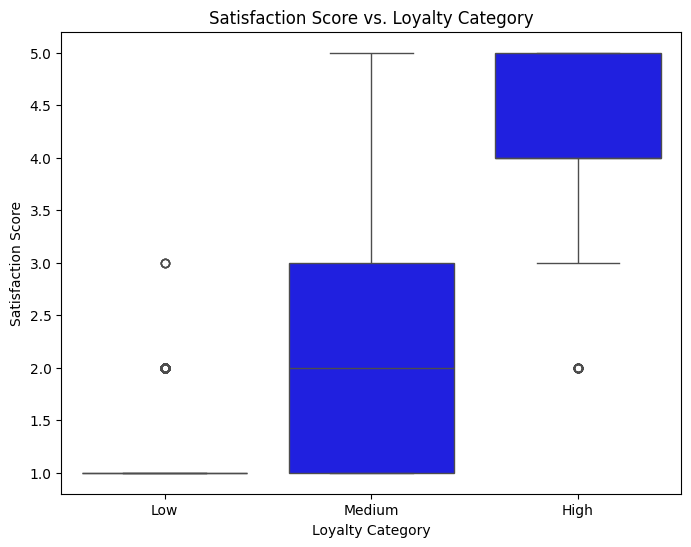

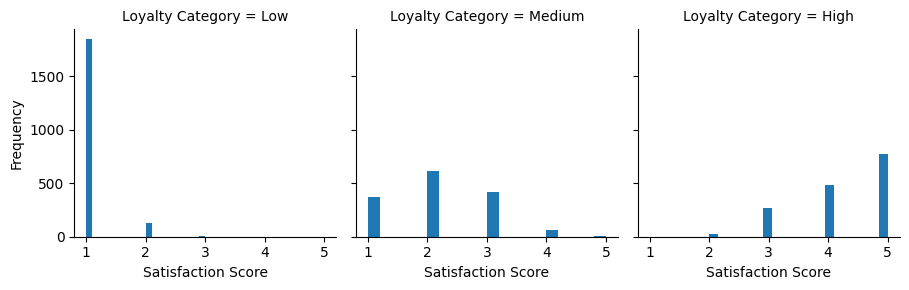

In [129]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Satisfaction Score', data=df_cleaned, color='blue')
plt.title('Satisfaction Score vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Satisfaction Score')
plt.show()

# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Satisfaction Score', bins=20)
g.set_axis_labels('Satisfaction Score', 'Frequency')
plt.show()

* The box plot comparing satisfaction scores across loyalty categories ('Low', 'Medium', 'High') shows a clear trend. Customers in the 'High' loyalty category tend to have higher satisfaction scores compared to those in the 'Low' or 'Medium' categories.
* The histograms further support this trend. The distribution of satisfaction scores for the 'High' loyalty category is shifted towards higher values, indicating that highly loyal customers are generally more satisfied.
* As satisfaction scores increase, the likelihood of a customer belonging to a higher loyalty category also increases. This suggests a positive relationship between satisfaction and loyalty.


### **4.6 Warranty Extension**


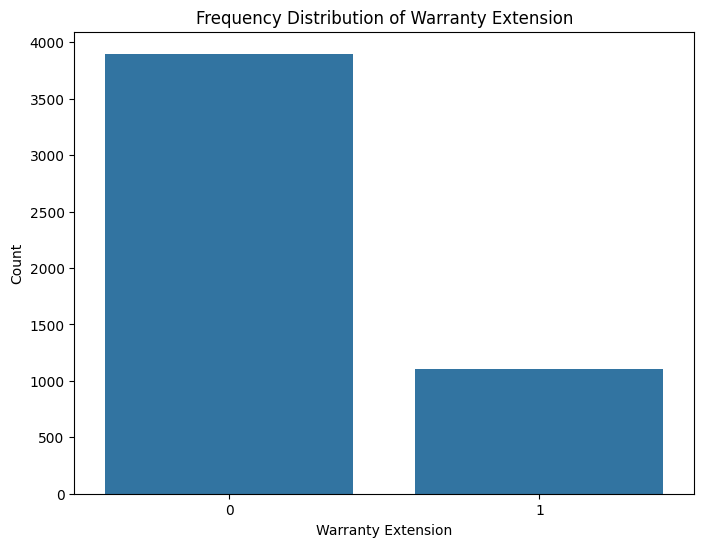

Summary Statistics for 'Warranty Extension':
 count    5000.000000
mean        0.220400
std         0.414558
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Warranty Extension, dtype: float64

Frequency Distribution of 'Warranty Extension':
 Warranty Extension
0    3898
1    1102
Name: count, dtype: int64


In [130]:
# 1. Summary Statistics
warranty_extension_stats = df_cleaned['Warranty Extension'].describe()

# 2. Frequency Distribution
warranty_extension_counts = df_cleaned['Warranty Extension'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Warranty Extension', data=df_cleaned)
plt.title('Frequency Distribution of Warranty Extension')
plt.xlabel('Warranty Extension')
plt.ylabel('Count')
plt.show()

print("Summary Statistics for 'Warranty Extension':\n", warranty_extension_stats)
print("\nFrequency Distribution of 'Warranty Extension':\n", warranty_extension_counts)

* The 'Warranty Extension' variable is a binary categorical variable (0 or 1) indicating whether a customer opted for a warranty extension.
* The bar plot will show the frequency of each category (0 or 1) visually.
* By comparing the counts or bar heights, you can determine the proportion of customers who opted for the warranty extension versus those who didn't. For example, if 1000 customers opted for the extension and 4000 didn't, it means approximately 20% of customers chose the extension.

### **4.6.1 How Warranty Extension Impact on Loyalty**

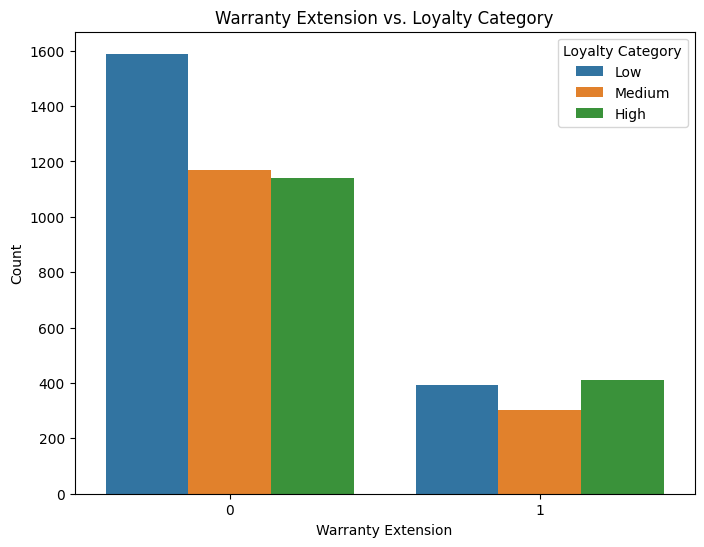

Loyalty Category,Low,Medium,High
Warranty Extension,,,
0,40.764495,29.964084,29.271421
1,35.571688,27.313975,37.114338


In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Warranty Extension', hue='Loyalty Category', data=df_cleaned)
plt.title('Warranty Extension vs. Loyalty Category')
plt.xlabel('Warranty Extension')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of customers in each loyalty category who purchased warranty extension
warranty_loyalty_crosstab = pd.crosstab(df_cleaned['Warranty Extension'], df_cleaned['Loyalty Category'])
warranty_loyalty_percentages = warranty_loyalty_crosstab.div(warranty_loyalty_crosstab.sum(axis=1), axis=0) * 100
warranty_loyalty_percentages

**Possible Interpretations:**

* Trust and Brand Loyalty: Highly loyal customers might have greater trust in the brand and its products, leading them to be more willing to invest in additional services like warranty extensions.
* Perceived Value: Loyal customers may perceive greater value in the warranty extension, possibly due to past positive experiences with the brand.

### **4.7 Gender**

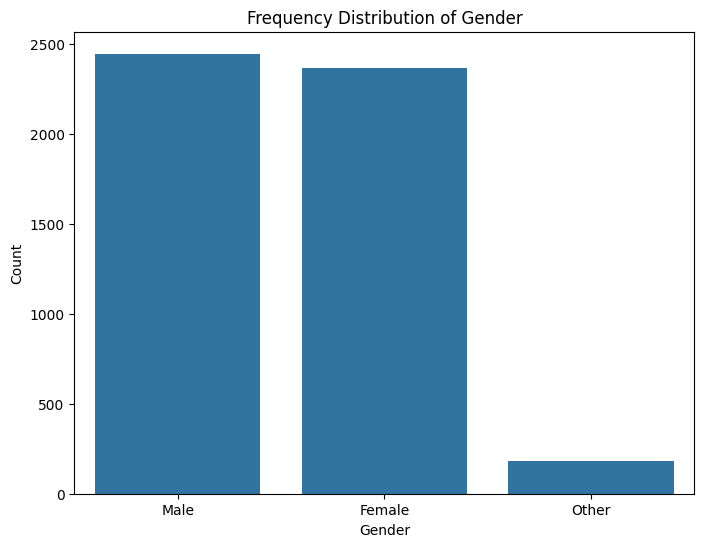

Summary Statistics for 'Gender':
 count     5000
unique       3
top       Male
freq      2448
Name: Gender, dtype: object

Frequency Distribution of 'Gender':
 Gender
Male      2448
Female    2371
Other      181
Name: count, dtype: int64


In [132]:
# Gender Univariate Analysis

# 1. Summary Statistics
gender_stats = df_cleaned['Gender'].describe()

# 2. Frequency Distribution
gender_counts = df_cleaned['Gender'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Summary Statistics for 'Gender':\n", gender_stats)
print("\nFrequency Distribution of 'Gender':\n", gender_counts)

Insights:
* The dataset is predominantly made up of males and females, with a small proportion identifying as "Other."
* The most frequent category is "Male," occurring 2448 times.
* The higher frequency of "Male" suggests a potential gender imbalance in the dataset.


### **4.7.1 How Gender Impact on Loyalty**

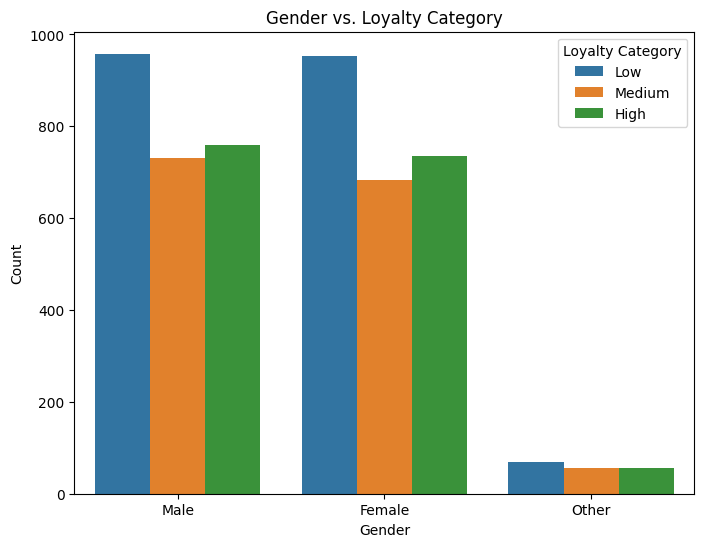

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loyalty Category', data=df_cleaned)
plt.title('Gender vs. Loyalty Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [134]:
gender_loyalty_crosstab = pd.crosstab(df_cleaned['Gender'], df_cleaned['Loyalty Category'])
gender_loyalty_percentages = gender_loyalty_crosstab.div(gender_loyalty_crosstab.sum(axis=1), axis=0) * 100
gender_loyalty_percentages

# This will display the percentage of each loyalty category for each gender, allowing you to compare the loyalty distributions across genders more precisely.

Loyalty Category,Low,Medium,High
Gender,,,
Female,40.194011,28.764235,31.041755
Male,39.133987,29.861111,31.004902
Other,38.674033,30.939227,30.386740


### **4.8 Region**

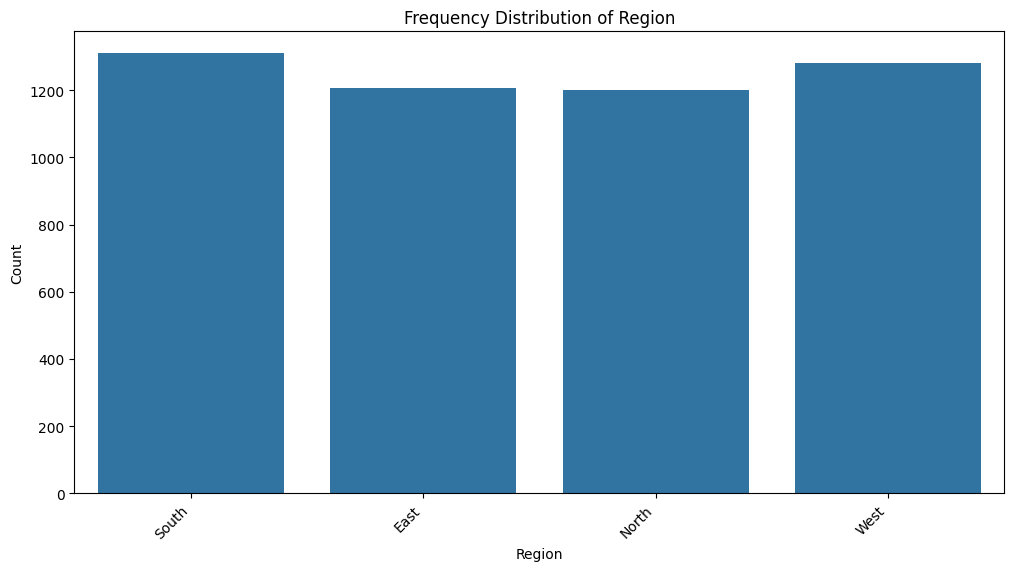

Summary Statistics for 'Region':
 count      5000
unique        4
top       South
freq       1310
Name: Region, dtype: object

Frequency Distribution of 'Region':
 Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64


In [135]:
# Region Univariate Analysis

# 1. Summary Statistics
region_stats = df_cleaned['Region'].describe()

# 2. Frequency Distribution
region_counts = df_cleaned['Region'].value_counts()

# 3. Bar Plot (for categorical variable)
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df_cleaned)
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

print("Summary Statistics for 'Region':\n", region_stats)
print("\nFrequency Distribution of 'Region':\n", region_counts)

* The dataset appears to be relatively evenly distributed across the four regions, with South being the most represented and North being the least represented.
* The most frequent region is "South," occurring 1310 times.
* The dataset seems to have a relatively balanced representation of different regions, which can be beneficial for drawing general conclusions.


### **4.8.1 How Region Impact on Loyalty**

Loyalty Category        Low     Medium       High
Region                                           
East              39.569536  29.056291  31.374172
North             38.634471  29.308909  32.056619
South             40.229008  28.473282  31.297710
West              39.968774  30.679157  29.352069


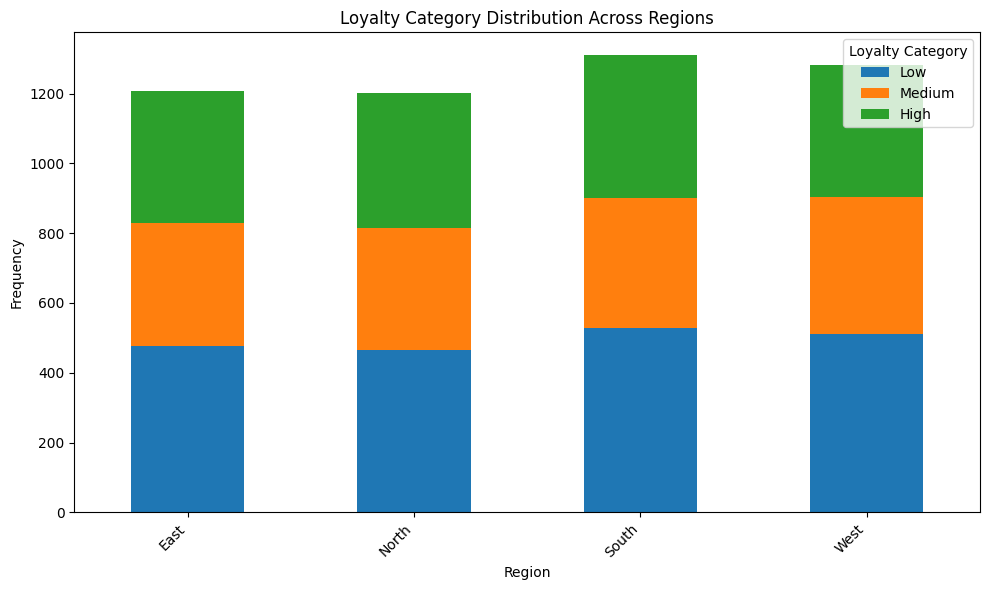

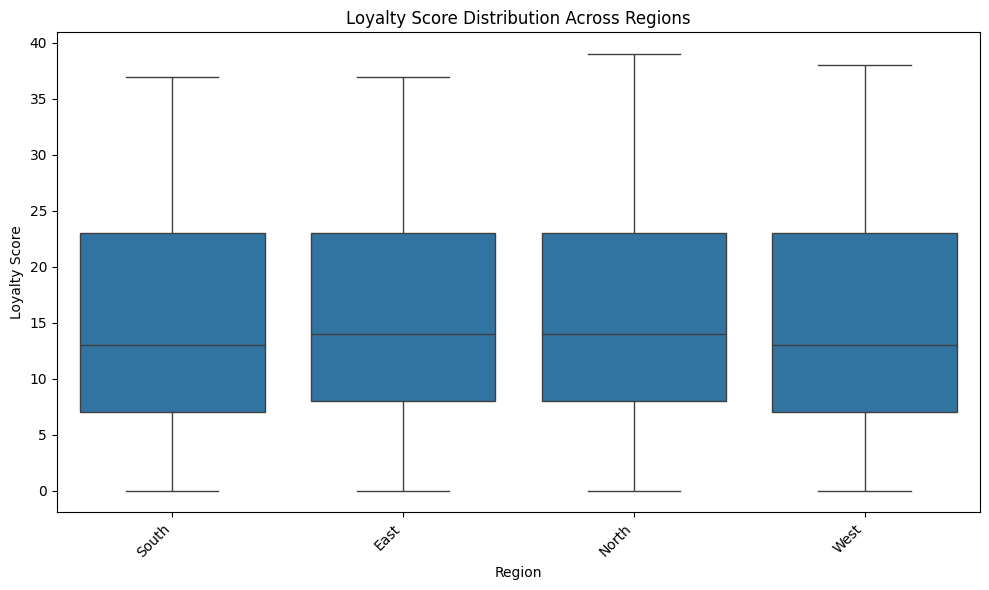

In [136]:
# Calculate the percentage of each loyalty category for each region
region_loyalty_crosstab = pd.crosstab(df_cleaned['Region'], df_cleaned['Loyalty Category'])
region_loyalty_percentages = region_loyalty_crosstab.div(region_loyalty_crosstab.sum(axis=1), axis=0) * 100

# Display the percentages
print(region_loyalty_percentages)

# Plot the stacked bar chart
region_loyalty_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loyalty Category Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Loyalty Category')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Loyalty Score', data=df_cleaned)
plt.title('Loyalty Score Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Interpretation and Conclusion:**

* Regional Differences: Significant regional variations in loyalty categories or satisfaction scores suggest regional factors influence customer loyalty.

* Potential Factors: Cultural nuances, economic conditions, and regional marketing strategies might contribute to these differences.

* Business Implications: Tailoring marketing and customer retention efforts to specific regions can optimize business outcomes.

### **4.9 Product Category**

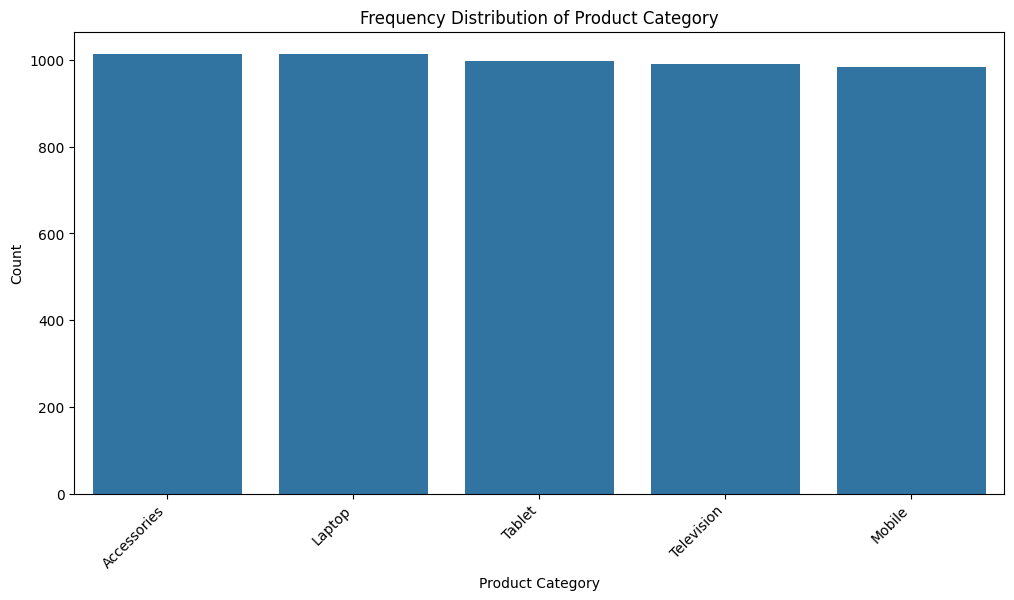


Frequency Distribution of Product Category:
 Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64


In [137]:
# Univariate analysis for Product Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', data=df_cleaned)
plt.title('Frequency Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Frequency distribution of 'Product Category'
product_category_counts = df['Product Category'].value_counts()
print("\nFrequency Distribution of Product Category:\n", product_category_counts)

* The dataset appears to have a relatively even distribution of products across the five categories: Accessories, Laptop, Tablet, Television, and Mobile.
* Accessories and Laptops are slightly more frequent than the other categories, but the differences are not substantial.

### **4.9.1 How Product Category Impact on Loyalty**

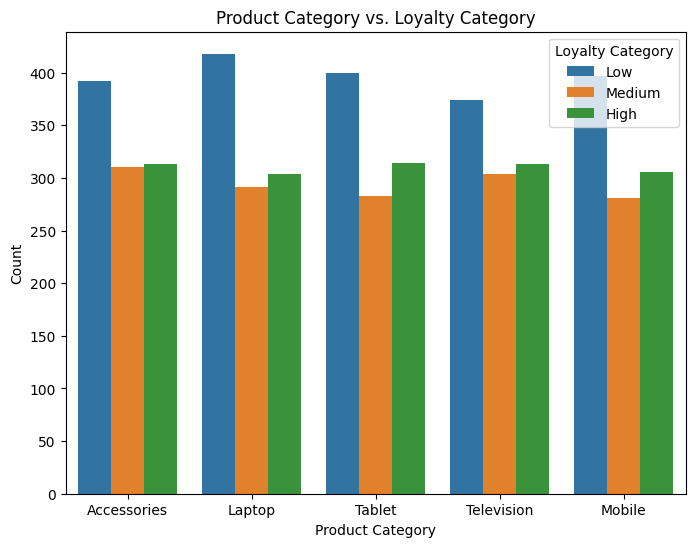

In [138]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Product Category', hue='Loyalty Category', data=df_cleaned)
plt.title('Product Category vs. Loyalty Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

**Possible Interpretations:**

* Product Engagement: Mobile phones, being highly personal devices, often require frequent usage and interaction, leading to stronger customer relationships and higher loyalty.
* Purchase Frequency: Accessories might be purchased more frequently, leading to more interactions with the brand and potentially increasing loyalty.
* Product Complexity: Laptops, tablets, and televisions, being more complex products, might require additional support and services, which could influence customer loyalty.

### **4.10 Payment Method**

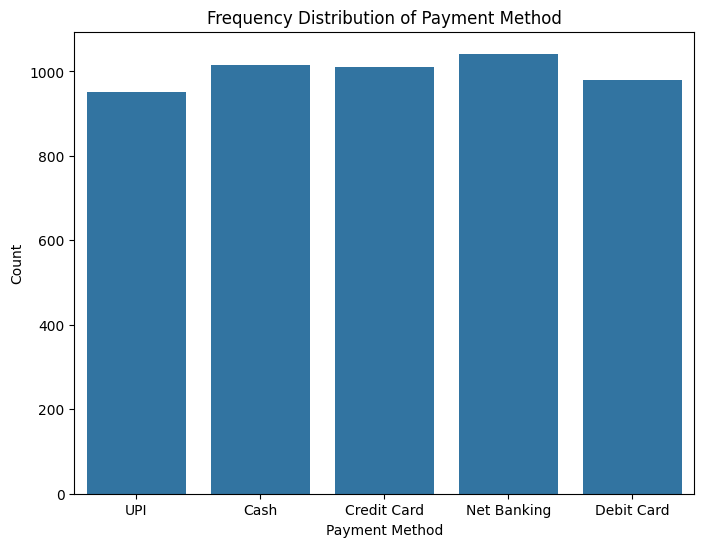


Frequency Distribution of Payment Method:
 Payment Method
Net Banking    1042
Cash           1015
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64


In [139]:
# Univariate analysis for Payment Method
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=df_cleaned)
plt.title('Frequency Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# Frequency distribution of 'Payment Method'
payment_method_counts = df_cleaned['Payment Method'].value_counts()
print("\nFrequency Distribution of Payment Method:\n", payment_method_counts)

* The distribution suggests that customers have diverse preferences for payment methods.
*  The popularity of Net Banking, Credit Card, and Debit Card indicates a preference for digital payment methods.
* While cash is still a popular option, its usage is comparable to other methods, suggesting a shift towards digital payments.

### **4.10.1 How Payment Method Impact on Loyalty**

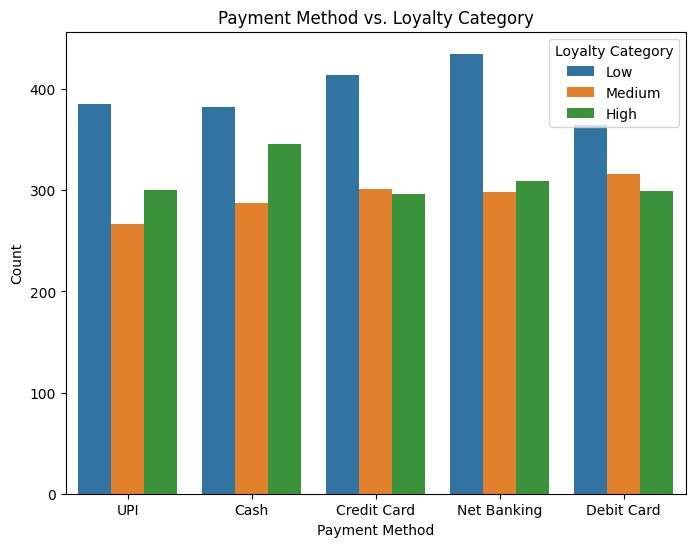

Loyalty Category,Low,Medium,High
Payment Method,,,
Cash,37.635468,28.275862,34.088670
Credit Card,40.949555,29.772502,29.277943
Debit Card,37.244898,32.244898,30.510204
Net Banking,41.746641,28.598848,29.654511
UPI,40.441176,28.046218,31.512605


In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', hue='Loyalty Category', data=df_cleaned)
plt.title('Payment Method vs. Loyalty Category')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each loyalty category for each payment method
payment_loyalty_crosstab = pd.crosstab(df_cleaned['Payment Method'], df_cleaned['Loyalty Category'])
payment_loyalty_percentages = payment_loyalty_crosstab.div(payment_loyalty_crosstab.sum(axis=1), axis=0) * 100

# Display the percentages
payment_loyalty_percentages

Key Observations:

* UPI and Debit Card: Higher use of these methods correlates with higher customer loyalty.
* Credit Card and Net Banking: These methods show a mix of loyalty levels.
* Cash: Cash payments are associated with lower customer loyalty.

In [141]:
from scipy.stats import ttest_ind

# Filter data for credit card and debit card users
credit_card_loyalty = df_cleaned[df_cleaned['Payment Method'] == 'Credit Card']['Loyalty Score'].dropna()
debit_card_loyalty = df_cleaned[df_cleaned['Payment Method'] == 'Debit Card']['Loyalty Score'].dropna()

# Perform t-test
t_statistic, p_value = ttest_ind(credit_card_loyalty, debit_card_loyalty)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -1.6736478688363288
P-value: 0.09435706135925828


A high p-value (typically above 0.05) suggests that there is no statistically significant difference in loyalty scores between the two groups. This means that any observed difference in means is likely due to random chance rather than a true difference in loyalty.

### **4.11 Revenue**

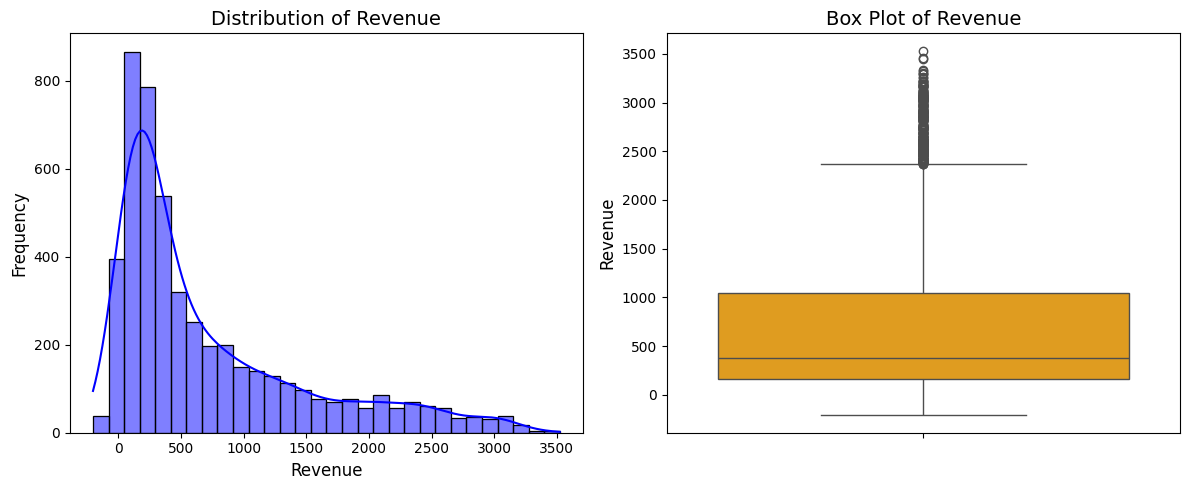

Summary Statistics for 'Revenue':
 count    5000.000000
mean      717.998214
std       776.789137
min      -201.427094
25%       164.697614
50%       380.548500
75%      1047.426498
max      3523.469177
Name: Revenue, dtype: float64


In [142]:
# 1. Summary Statistics
stats = df_cleaned['Revenue'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Revenue'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Revenue', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Revenue'], color='orange')
plt.title('Box Plot of Revenue', fontsize=14)
plt.ylabel('Revenue', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Revenue':\n", stats)

* The distribution of revenue appears to be right-skewed. This means that most of the revenue values are concentrated on the lower end, with a few high-value outliers pulling the distribution towards the right.
* The distribution seems to have a few modes, indicating multiple peaks in the data. This might suggest different segments of customers with varying spending habits.

### **4.11.1 How Revenue Impact on Loyalty**

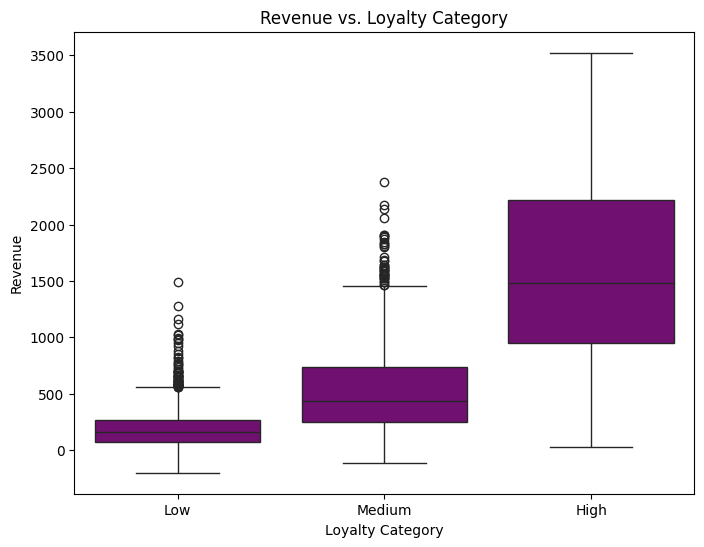

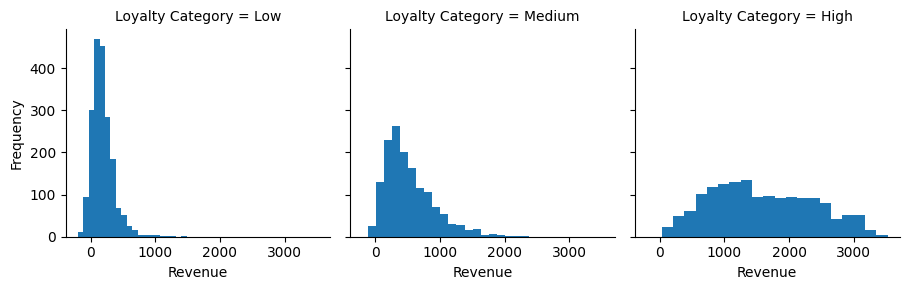

In [143]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Revenue', data=df_cleaned, color='purple')
plt.title('Revenue vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Revenue')
plt.show()

# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Revenue', bins=20)
g.set_axis_labels('Revenue', 'Frequency')
plt.show()

* The revenue distributions for all three loyalty categories are right-skewed, indicating a larger number of customers with lower revenue and a smaller number with higher revenue.

**Category-wise Differences:**
* Low Loyalty: The distribution is more concentrated towards lower revenue values, suggesting that low-loyalty customers tend to spend less.
* Medium Loyalty: The distribution is somewhat broader, with a mix of customers spending both lower and higher amounts.
* High Loyalty: The distribution is shifted towards higher revenue values, indicating that high-loyalty customers tend to spend more.

### **4.12 Store Rating**

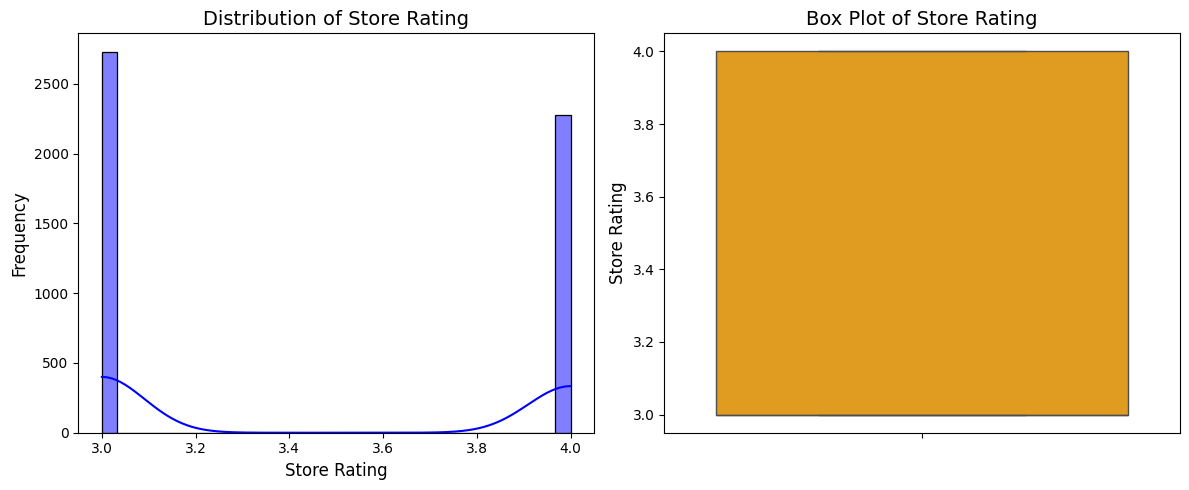

Summary Statistics for 'Store Rating':
 count    5000.000000
mean        3.455000
std         0.498021
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Store Rating, dtype: float64


In [144]:
# 1. Summary Statistics
stats = df_cleaned['Store Rating'].describe()

# Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# 2. Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Store Rating'].dropna(), bins=30,kde=True, color='blue')
plt.title('Distribution of Store Rating', fontsize=14)
plt.xlabel('Store Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 3. Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Store Rating'], color='orange')
plt.title('Box Plot of Store Rating', fontsize=14)
plt.ylabel('Store Rating', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Store Rating':\n", stats)

**Key TakeWays:**
* The distribution of store ratings appears to be roughly normally distributed, with a slight skew to the right. This means that most customers tend to give ratings around the mean (around 3.97), with fewer customers giving extremely high or low ratings.
* The store ratings seem to be generally positive, with most customers giving ratings between 3.75 and 4.15. There is a small portion of customers who gave very low or very high ratings, which might indicate potential areas for improvement or exceptional service

### **4.12.1 How Store Rating Impact on Loyalty**

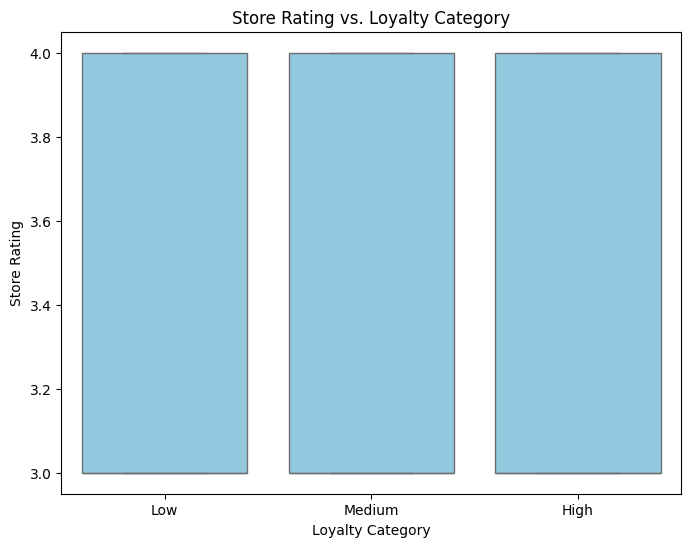

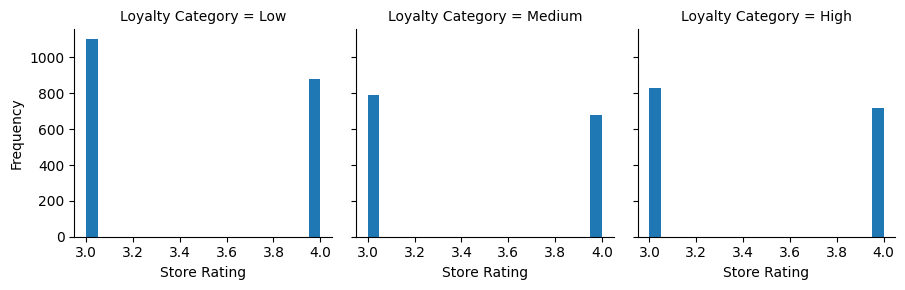

In [145]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Store Rating', data=df_cleaned, color='skyblue')
plt.title('Store Rating vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Store Rating')
plt.show()

# Histograms with Facets
g = sns.FacetGrid(df_cleaned, col='Loyalty Category', margin_titles=True)
g.map(plt.hist, 'Store Rating', bins=20)
g.set_axis_labels('Store Rating', 'Frequency')
plt.show()

**Key Observation:**

* The store rating appears to be relatively consistent across all three loyalty categories (Low, Medium, and High).
* Discrete Ratings: The store ratings appear to be discrete values, possibly on a scale of 3 to 4.
* Peak at 4.0: The majority of ratings in all three loyalty categories are concentrated around the highest rating of 4.0.
* Similar Distribution: The distribution of ratings is relatively similar across all three loyalty categories, with a peak at 4.0 and fewer ratings at lower points.

### **4.13 Loyalty Score**

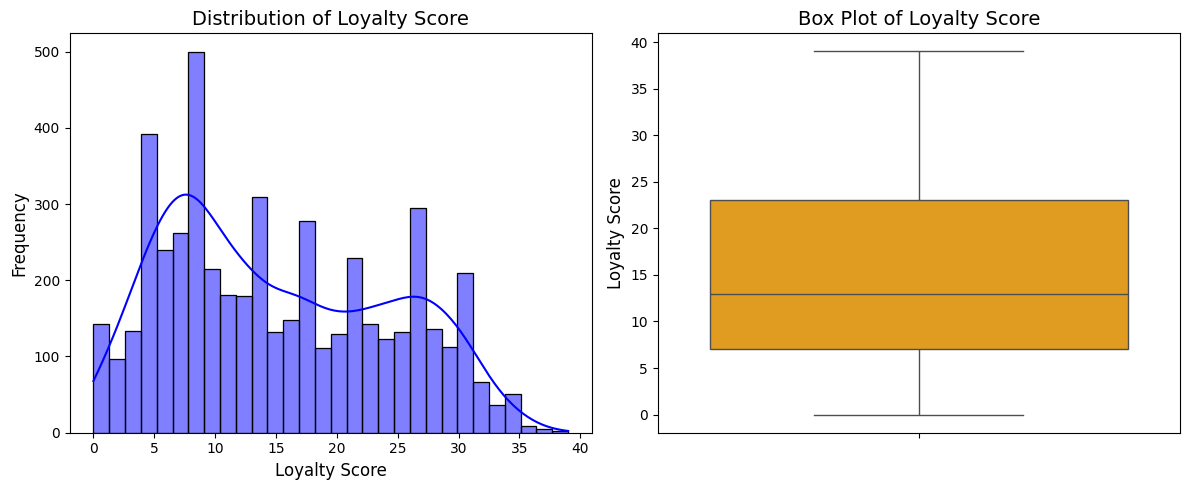

Summary Statistics for 'Loyalty Score':
 count    5000.000000
mean       15.141600
std         9.141327
min         0.000000
25%         7.000000
50%        13.000000
75%        23.000000
max        39.000000
Name: Loyalty Score, dtype: float64


In [146]:
# Univariate Analysis for Loyalty Score

# 1. Summary Statistics
loyalty_stats = df_cleaned['Loyalty Score'].describe()

# 2. Histogram and Box Plot for the distribution
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Loyalty Score'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Loyalty Score', fontsize=14)
plt.xlabel('Loyalty Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Loyalty Score'], color='orange')
plt.title('Box Plot of Loyalty Score', fontsize=14)
plt.ylabel('Loyalty Score', fontsize=12)

plt.tight_layout()
plt.show()

print("Summary Statistics for 'Loyalty Score':\n", loyalty_stats)

* The 'Loyalty Score' is a numerical variable in your dataset representing the loyalty of a customer. Higher scores indicate higher loyalty.
* The average loyalty score is around 15.64, which indicates moderate customer loyalty on average.



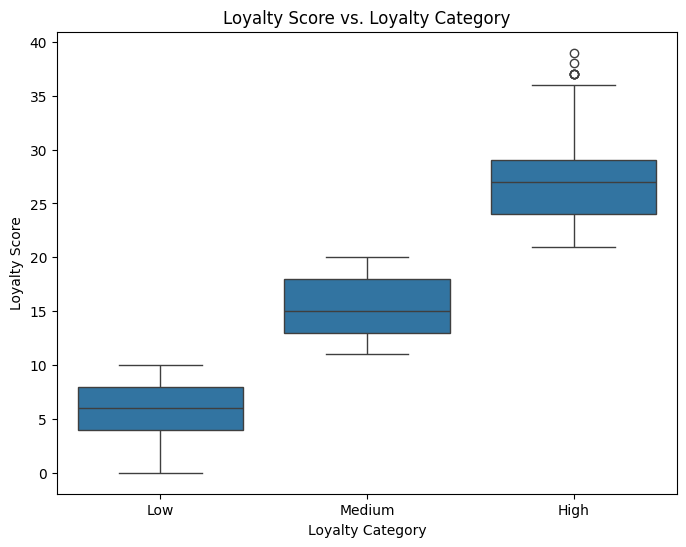

In [147]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loyalty Category', y='Loyalty Score', data=df_cleaned)  # Use 'Loyalty Score' instead of 'Satisfaction Score'
plt.title('Loyalty Score vs. Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Loyalty Score')
plt.show()

### **4.14 Membership Status**

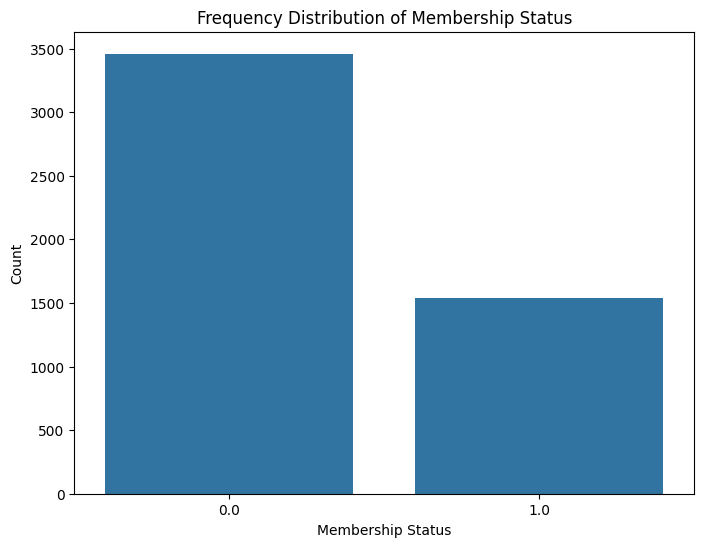


Frequency Distribution of Membership Status:
 Membership Status
0.0    3460
1.0    1540
Name: count, dtype: int64


In [148]:
# Univariate analysis for Membership Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Membership Status', data=df_cleaned)
plt.title('Frequency Distribution of Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.show()

# Frequency distribution of 'Membership Status'
membership_status_counts = df_cleaned['Membership Status'].value_counts()
print("\nFrequency Distribution of Membership Status:\n", membership_status_counts)

We can see that there are more non-members (3460) than members (1540) in this dataset. This could indicate a potential opportunity to focus on membership acquisition strategies.






### **4.14.1 How Membership Status Impact on Loyalty**

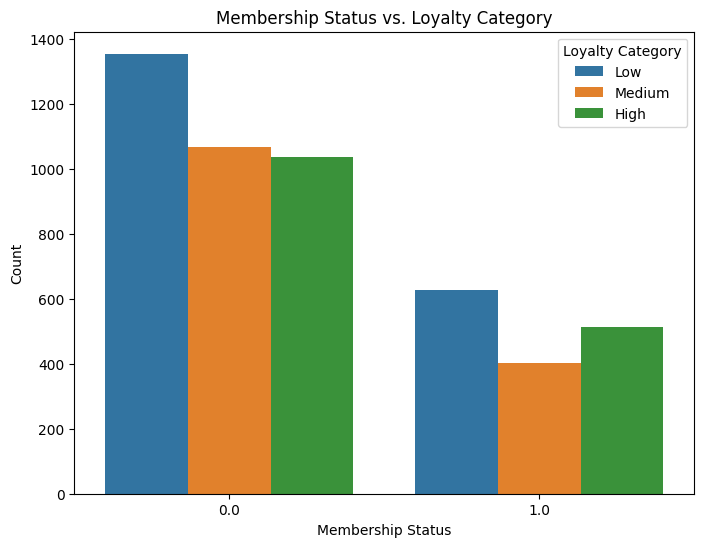

Loyalty Category,Low,Medium,High
Membership Status,,,
0.0,39.161850,30.838150,30.000000
1.0,40.649351,26.103896,33.246753


In [149]:
# Bivariate analysis: Membership Status vs. Loyalty Score
plt.figure(figsize=(8, 6))
sns.countplot(x='Membership Status', hue='Loyalty Category', data=df_cleaned)
plt.title('Membership Status vs. Loyalty Category')
plt.xlabel('Membership Status')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each loyalty category for each membership status
membership_loyalty_crosstab = pd.crosstab(df_cleaned['Membership Status'], df_cleaned['Loyalty Category'])
membership_loyalty_percentages = membership_loyalty_crosstab.div(membership_loyalty_crosstab.sum(axis=1), axis=0) * 100

# Display the percentages
membership_loyalty_percentages

**Key Observations:**

* Membership and Loyalty: There appears to be a positive correlation between membership status and loyalty category.
* High Loyalty and Membership: The "High" loyalty category has a significantly higher proportion of members compared to non-members.
* Low Loyalty and Non-Membership: The "Low" loyalty category has a higher proportion of non-members.

### **4.15 Preferred Visit Time**

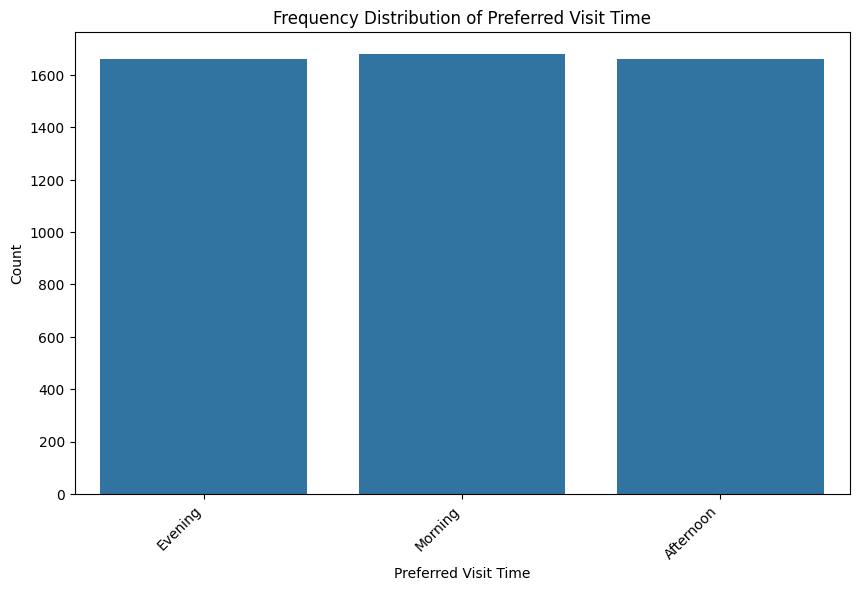


Frequency Distribution of Preferred Visit Time:
 Preferred Visit Time
Morning      1680
Evening      1660
Afternoon    1660
Name: count, dtype: int64


In [150]:
# Univariate analysis for Preferred Visit Time
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', data=df_cleaned)
plt.title('Frequency Distribution of Preferred Visit Time')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Frequency distribution of 'Preferred Visit Time'
preferred_visit_time_counts = df_cleaned['Preferred Visit Time'].value_counts()
print("\nFrequency Distribution of Preferred Visit Time:\n", preferred_visit_time_counts)

**Key Observations:**
* The distribution of preferred visit times is relatively even across morning, evening, and afternoon. This suggests that the store has a consistent customer flow throughout the day.

### **4.15.1 How Preferred Visit Time Impact on Loyalty**

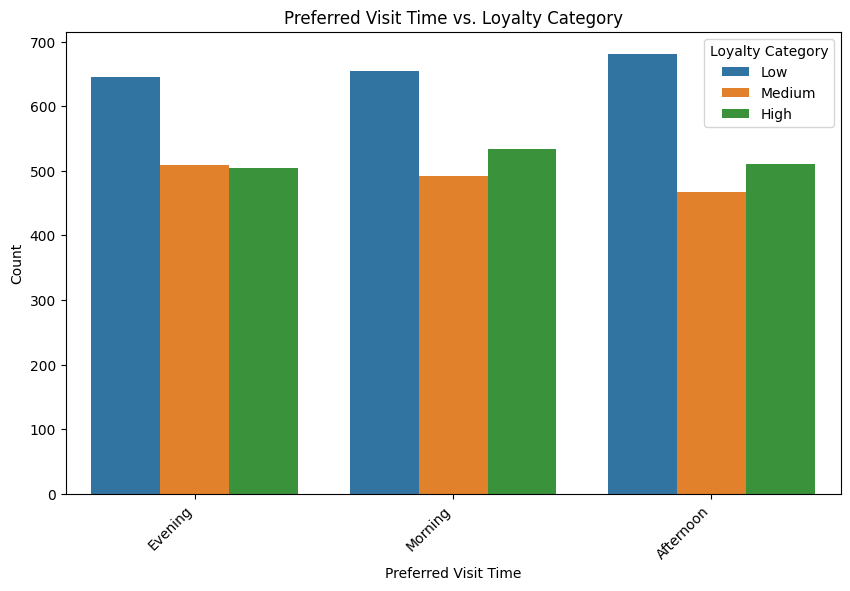

Loyalty Category,Low,Medium,High
Preferred Visit Time,,,
Afternoon,41.024096,28.192771,30.783133
Evening,38.915663,30.662651,30.421687
Morning,38.928571,29.285714,31.785714


In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', hue='Loyalty Category', data=df_cleaned)
plt.title('Preferred Visit Time vs. Loyalty Category')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate loyalty category percentages for each preferred visit time
visit_time_loyalty = pd.crosstab(df_cleaned['Preferred Visit Time'], df_cleaned['Loyalty Category'])
visit_time_loyalty_percentages = visit_time_loyalty.div(visit_time_loyalty.sum(axis=1), axis=0) * 100
visit_time_loyalty_percentages

## **5.  Loyalty Category : Target Variable**

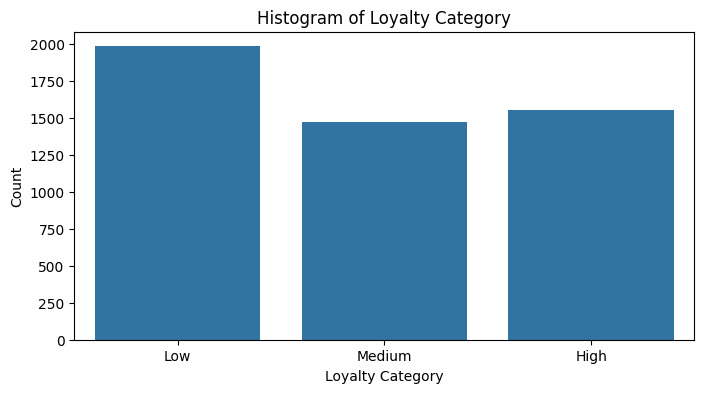

In [152]:
# Create a histogram of the 'Loyalty Category'
plt.figure(figsize=(8, 4))
sns.countplot(x='Loyalty Category', data=df_cleaned)
plt.title('Histogram of Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.show()

Class Distribution for Loyalty Category:
Loyalty Category
Low       1981
High      1550
Medium    1469
Name: count, dtype: int64

Class Distribution in Percentage:
Loyalty Category
Low       39.62
High      31.00
Medium    29.38
Name: count, dtype: float64
Class imbalance in 'Loyalty Category' is not severe, it might not require special treatment.


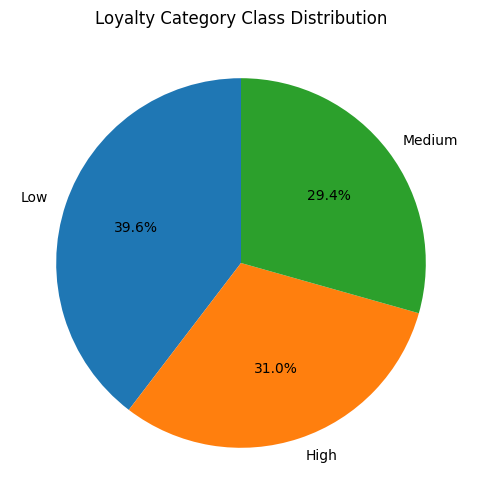

In [153]:
#check class imbalance on loyalty category

# Calculate the class distribution for 'Loyalty Category'
loyalty_category_counts = df_cleaned['Loyalty Category'].value_counts()

# Print the class distribution
print("Class Distribution for Loyalty Category:")
print(loyalty_category_counts)

# Calculate the percentage of each class
loyalty_category_percentages = (loyalty_category_counts / len(df_cleaned)) * 100

# Print the class distribution in percentage
print("\nClass Distribution in Percentage:")
print(loyalty_category_percentages)

# Check for significant class imbalance (e.g., if one class is much larger than others)
# You can define a threshold for imbalance, such as a ratio of 1:5 or more.
# For example:
if loyalty_category_percentages.max() > 80:  # If the largest class is more than 80% of the total
  print("Significant class imbalance detected in 'Loyalty Category'. Consider techniques to address it.")
else:
  print("Class imbalance in 'Loyalty Category' is not severe, it might not require special treatment.")

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.pie(loyalty_category_counts, labels=loyalty_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loyalty Category Class Distribution')
plt.show()

**Key Observation:**

* The distribution of loyalty categories is relatively balanced, with no significant class imbalance.

**Insights:**

* Balanced Distribution: This balanced distribution suggests that the dataset represents a diverse customer base, with a mix of low, medium, and high-loyalty customers.
* No Overrepresentation: No specific category dominates the dataset, indicating that the model will likely have sufficient data to learn patterns and make accurate predictions for all loyalty levels.
* Balanced Model Training: This balanced distribution will help in training a robust machine learning model that can accurately classify customers into their respective loyalty categories.

### **5.1 Encoding the Target Variable**

In [154]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
df_cleaned['Loyalty Category'] = target_encoder.fit_transform(df_cleaned['Loyalty Category'])

In [195]:
import pickle

with open('target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)

In [155]:
df_cleaned['Loyalty Category'].value_counts()

,count
Loyalty Category,
1,1981
0,1550
2,1469


### **5.2 Drop Loyalty Score**

In [156]:
df_cleaned.drop('Loyalty Score', axis=1, inplace=True)

### **5.3 Key Features Driving Loyalty Prediction**

In [157]:
# Perform ANOVA test for each numerical feature
anova_results = []
categories = df_cleaned['Loyalty Category'].unique()

# Recalculate numerical_features after dropping 'Loyalty Score' to avoid KeyError
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.difference(['Loyalty Category Encoded'])

for feature in numerical_features:
    # Group data by 'Loyalty Category' for the current feature
    feature_groups = [df_cleaned[df_cleaned['Loyalty Category'] == category][feature].dropna() for category in categories]
    # Perform ANOVA test
    stat, p_value = f_oneway(*feature_groups)
    anova_results.append({'Feature': feature, 'F-Statistic': stat, 'P-Value': p_value})

# Create a DataFrame to store and sort the results
anova_results_df = pd.DataFrame(anova_results).sort_values(by='P-Value')

# Display the DataFrame in a more formatted way:
display(anova_results_df.style.set_caption("ANOVA Test Results for Feature Significance"))

,Feature,F-Statistic,P-Value
1,Discount (%),1484.092656,0.000000
2,Items Purchased,898.409335,0.000000
3,Loyalty Category,inf,0.000000
5,Revenue,3615.224163,0.000000
6,Satisfaction Score,10276.044710,0.000000
8,Total Spent,1513.580459,0.000000
9,Warranty Extension,12.528909,0.000004
4,Membership Status,6.185930,0.002074
7,Store Rating,0.846538,0.428958
0,Age,0.130601,0.877571


**Significant Features:**
In statistical tests, features are considered significant if their p-value is below a chosen significance level (commonly 0.05). Based on data:

**Features with p-value < 0.05 (Significant):**

1. Discount (%)
2. Items Purchased
3. Revenue
4. Satisfaction Score
5. Total Spent
6. Warranty Extension
7. Membership Status

### **5.4 Correlation of each numerical variable with the Loyalty Score**

In [158]:
# Assuming 'df_cleaned' is your DataFrame and 'Loyalty Score' is your target variable
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
correlation_with_target = df_cleaned[numerical_features].corr()['Loyalty Category']

# Print the correlation of each numerical variable with the target variable
print("Correlation with Loyalty Category:\n", correlation_with_target)

Correlation with Loyalty Category:
 Age                  -0.006949
Items Purchased      -0.264180
Total Spent          -0.367017
Discount (%)          0.341463
Satisfaction Score   -0.569207
Warranty Extension   -0.055987
Revenue              -0.538153
Store Rating         -0.001626
Membership Status    -0.047428
Loyalty Category      1.000000
Name: Loyalty Category, dtype: float64


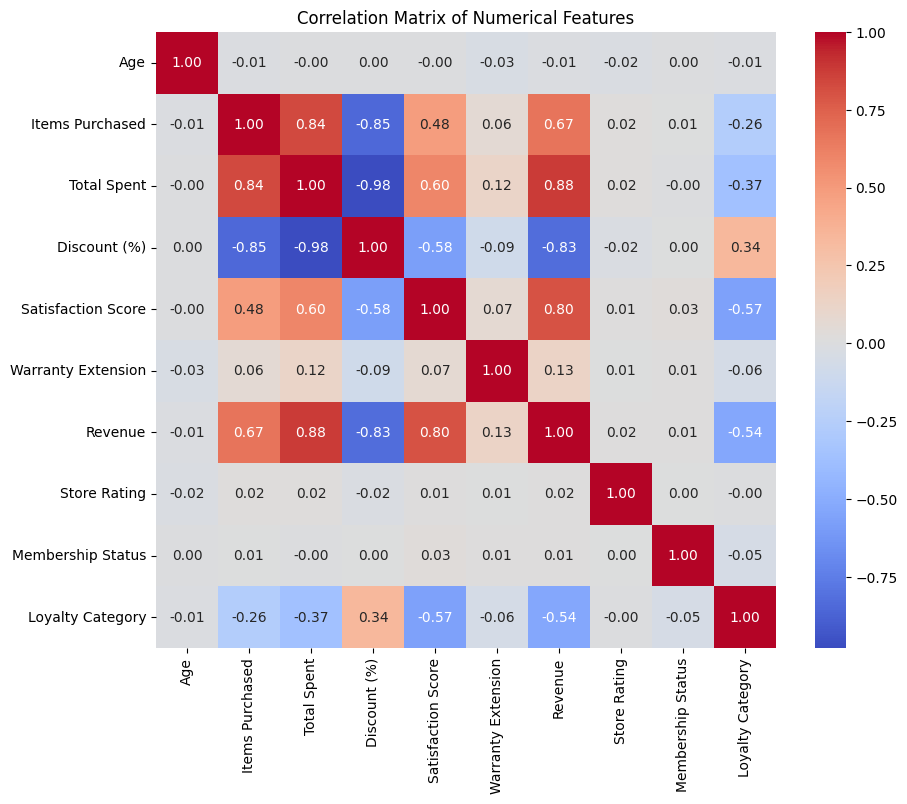

In [159]:
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
correlation_matrix = df_cleaned[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Insights from Correlation Matrix:**
1. **Strong Negative Correlations:**
   * Satisfaction Score (-0.57): High satisfaction scores are negatively correlated with lower loyalty categories, indicating higher loyalty as satisfaction increases.
   * Revenue (-0.54): Revenue decreases are linked to lower loyalty, suggesting that higher loyalty is associated with higher spending.
   * Total Spent (-0.37): Similar to revenue, total spending shows a moderate negative correlation with loyalty category.
2. **Moderate Positive Correlation:**
   * Discount (%) (0.34): Discounts positively correlate with loyalty category, indicating that higher discounts might attract or retain loyal customers.
3. **Weak Correlations:**
   * Items Purchased (-0.26): A slight negative correlation, indicating that purchasing fewer items may be linked to higher loyalty categories.
   * Warranty Extension (-0.06) and Membership Status (-0.05): Minimal impact on loyalty category, indicating these factors might not significantly influence loyalty.
4. **Negligible Correlation:**
   * Age (-0.01) and Store Rating (-0.00): These features have almost no correlation with loyalty category, suggesting they have little to no predictive power.
**Key Takeaways:**
* High-impact features for loyalty prediction include Satisfaction Score, Revenue, Total Spent, and Discount (%).
* Features like Age and Store Rating have minimal influence and may be less relevant for predictive models.

## **6. Documentation**

### **6.1 Key Findings from EDA:**

1. **Target Distribution (Loyalty Category):** The distribution of loyalty categories (Low, Medium, High) is relatively balanced, indicating that there is no significant class imbalance in the dataset. This is beneficial for building predictive models.

2. **Significant Features for Loyalty Prediction:**
   * Satisfaction Score: Strongly negatively correlated with loyalty category, suggesting that higher satisfaction scores correspond to higher loyalty.
   * Revenue: Higher revenue is associated with higher loyalty categories.
   * Discount (%): Positive correlation indicates that larger discounts are linked to higher loyalty.
   * Total Spent: Strongly linked to loyalty; customers spending more tend to be more loyal.
   * Items Purchased: Customers buying more items tend to have lower loyalty categories.

3. **Features with Minimal Impact:**
  * Age and Store Rating showed negligible correlation with the loyalty category. These features are unlikely to contribute significantly to model prediction.
4. **Potential Outliers:**
The presence of outliers in variables like Total Spent and Revenue can affect the performance of certain machine learning models. These outliers should be handled appropriately, either through transformation or robust modeling techniques.
5. **Correlation Among Features:** High correlations between Total Spent, Revenue, and Items Purchased suggest potential multicollinearity, which may need to be addressed (e.g., through dimensionality reduction techniques like PCA).
6. **Missing Data:** Some columns, such as Membership Status, Preferred Visit Time, and Payment Method, have missing values. Imputation strategies (mean, mode, or predictive imputation) should be applied before model building.

### **6.2 Potential Challenges for Further Analysis:**

1. **Multicollinearity:**
Highly correlated numerical features (e.g., Total Spent and Revenue) could lead to unstable coefficients in regression models or inflated feature importance in tree-based models. Addressing multicollinearity is essential.
2. **Class Overlap:** There may be overlapping characteristics between loyalty categories (e.g., Medium and High). Advanced classification techniques (e.g., SVM with non-linear kernels or ensemble models) might be required to handle this overlap.
3. **Categorical Features:** Features like Region, Gender, and Product Category are categorical and will require proper encoding (e.g., one-hot encoding or target encoding) to be effectively used in predictive models.
4. **Feature Scaling:**
Numerical features like Total Spent, Revenue, and Satisfaction Score have varying scales. Normalization or standardization might be needed for algorithms sensitive to feature scaling (e.g., SVM or KNN).
5. **Outliers:**
Extreme values in Total Spent and Revenue could bias the model. Robust methods like isolation forests or quantile-based outlier removal should be considered.
6. **Imbalanced Feature Importance:**
While features like Satisfaction Score and Discount (%) are highly significant, features with lower significance (e.g., Age, Store Rating) might introduce noise. Feature selection could help improve model performance.

## **Preprocessing**

## **7. Outlier Handling**

### **7.1 Outlier Checking**

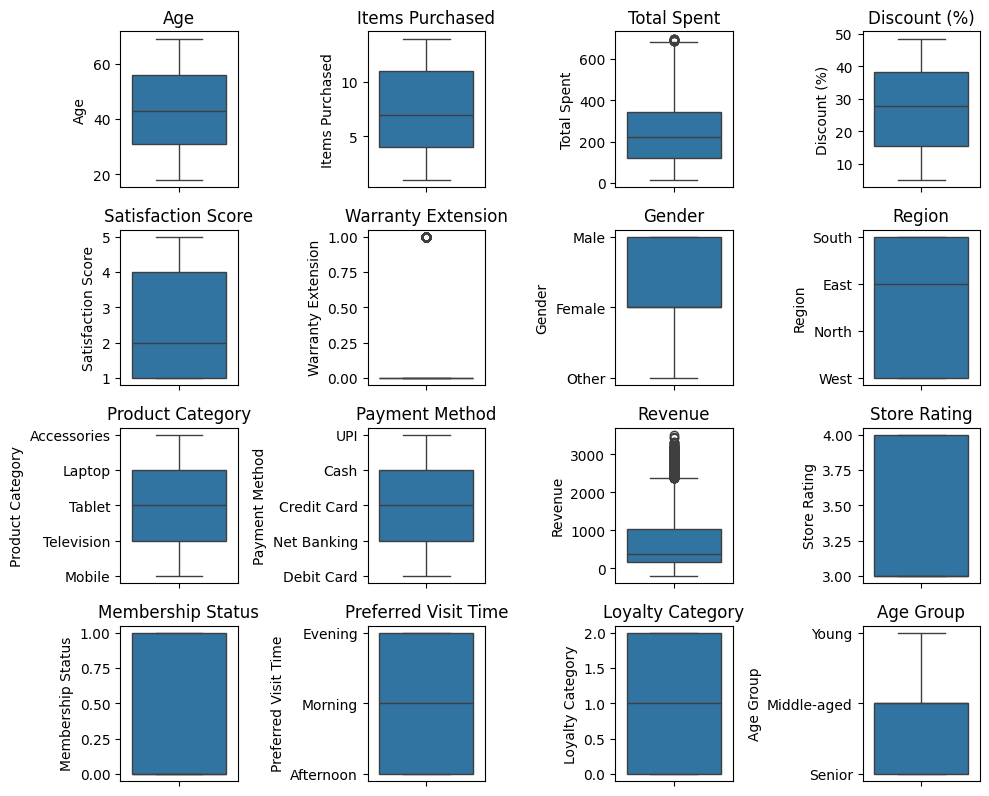

In [160]:
from logging import makeLogRecord

plt.figure(figsize=(10, 10))
for i, col in enumerate(df_cleaned):
    plt.subplot(5, 4, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**From the boxplot visualization observations Regarding Outliers:**
1. **Age, Items Purchased, Discount (%), Store Ratingand Satisfaction Score:** No visible outliers are present
2. **Warranty Extension:** A single high outlier is present, suggesting unusual behavior for warranty extension uptake.
3. **Total Spent:** A few outliers at the upper range.
4. **Revenue:** Several high outliers are visible, indicating customers with unusually high spending or revenue generation.
%. **Other Variables (Gender, Region, Product Category, Payment Method, Loyalty Score, Membership Status, Preferred Visit Time):**
These are categorical variables and not prone to outlier detection via boxplots.

### **7.2 Outlier counts for each numerical column**

In [161]:
# Select numerical columns for outlier detection
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each numerical column
outlier_summary = {}
for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].shape[0]
    outlier_summary[column] = outliers

# Display outlier counts for each numerical column
outlier_summary

{'Age': 0,
 'Items Purchased': 0,
 'Total Spent': 13,
 'Discount (%)': 0,
 'Satisfaction Score': 0,
 'Warranty Extension': 1102,
 'Revenue': 301,
 'Store Rating': 0,
 'Membership Status': 0,
 'Loyalty Category': 0}



**Analysis of Extreme Values**

**Total Spent and Revenue:** The extreme values (outliers) are likely genuine. High revenue often corresponds to high total spent, and vice versa. These outliers might represent large orders or sales from high-value customers.

### **7.3 Outliers Handling Approaches**
**Total Spent and Revenue:**
  * Conclusion: The extreme values in these variables are genuine and likely reflect real-world customer behavior.
  * Action Plan:
       * Retain these values without applying capping techniques.
       * Utilize robust scaling to minimize the influence of outliers during model training.
       * Apply robust machine learning models (e.g., Random Forest, Gradient Boosting, or Tree-based models) that are less sensitive to outliers.

## **8. Spliting Data as X and y**

In [175]:
# Spliting data as Independent and Dependent Variables
X = df_cleaned.drop(['Loyalty Category','Age Group'], axis=1) #Independent Variable
y = df_cleaned['Loyalty Category'] # Target

## **9. Robust Scaling**

In [176]:
from sklearn.preprocessing import RobustScaler

# Exclude ''Warranty Extension' and Membership Status' from scaling
columns_to_scale = ['Total Spent','Discount (%)','Revenue']

# Apply RobustScaler to the selected columns
scaler = RobustScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [196]:
import pickle

# Save the scaler object to a file
with open('robust_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## **10. One-Hot Encoding**

In [177]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Ensures one less category per column

# Select the categorical columns to encode
columns_to_encode = ['Gender', 'Region', 'Product Category', 'Preferred Visit Time','Payment Method']

# Extract categorical features from X
X_categorical = X[columns_to_encode]

# Perform one-hot encoding
encoded_array = encoder.fit_transform(X_categorical)

# Convert the encoded array back to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode), index=X.index)

# Combine the original dataset with the encoded DataFrame (dropping the original categorical columns)
X = pd.concat([X.drop(columns=columns_to_encode), encoded_df], axis=1)

In [197]:
import pickle

# Save the encoder object to a file
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

## **11. Feature Selection**

Feature selection is the process of identifying and retaining the most relevant features in a dataset for building a machine learning model. The goal is to improve the model's performance and interpretability while reducing complexity.

**Used Approaches:**
1. RFE
2. Mutual Info
3. Feature Importance Analysis

### **11.1 Mutual Information**
Mutual Information Regression is a method used in machine learning to quantify the relationship between the features (independent variables) and the target variable (dependent variable) in a regression task. It is based on the concept of mutual information from information theory, which measures the amount of information that one variable contains about another.

In [178]:
from sklearn.feature_selection import mutual_info_classif
# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Sort the features by mutual information score
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the results
mutual_info_df

,Feature,Mutual Information
4,Satisfaction Score,0.658138
6,Revenue,0.462299
2,Total Spent,0.229676
3,Discount (%),0.225442
1,Items Purchased,0.142639
19,Preferred Visit Time_Morning,0.023423
12,Region_South,0.019733
9,Gender_Male,0.012696
8,Membership Status,0.010857
18,Preferred Visit Time_Evening,0.008566


Based on the Mutual Information values, the top 10 features for predicting the loyalty category are:

**Top 10 Features:**
1. Satisfaction Score (0.658138)
2. Revenue (0.462299)
3. Total Spent (0.229676)
4. Discount (%) (0.225442)
5. Items Purchased (0.142639)
6. Preferred Visit Time_Morning (0.023423)
7. Region_South (0.019733)
8. Gender_Male (0.012696)
9. Membership Status (0.010857)
10. Preferred Visit Time_Evening (0.008566)
**Insights:**
* The Satisfaction Score is the most significant feature, showing the strongest relationship with the target variable.
* Financial metrics like Revenue, Total Spent, and Discount (%) are also highly relevant.
* Behavioral and demographic features, such as Preferred Visit Time and Region, show relatively weaker relationships but still make it to the top 10.

### **11.2 Feature Importance Analysis**
Feature Importance Analysis is a technique used to evaluate and rank the significance of each feature (input variable) in predicting the target variable. Understanding feature importance helps in identifying which features contribute the most to the model’s performance, guiding model optimization, feature selection, and interpretation.

                         Feature  Importance
4             Satisfaction Score    0.329042
6                        Revenue    0.214376
3                   Discount (%)    0.106497
2                    Total Spent    0.098564
0                            Age    0.052294
1                Items Purchased    0.052053
7                   Store Rating    0.010523
9                    Gender_Male    0.010252
19  Preferred Visit Time_Morning    0.009607
8              Membership Status    0.009023
18  Preferred Visit Time_Evening    0.008990
5             Warranty Extension    0.008934
11                  Region_North    0.008571
17   Product Category_Television    0.008248
13                   Region_West    0.008161
12                  Region_South    0.008017
15       Product Category_Mobile    0.007950
14       Product Category_Laptop    0.007814
21     Payment Method_Debit Card    0.007756
22    Payment Method_Net Banking    0.007630
23            Payment Method_UPI    0.007549
16       P

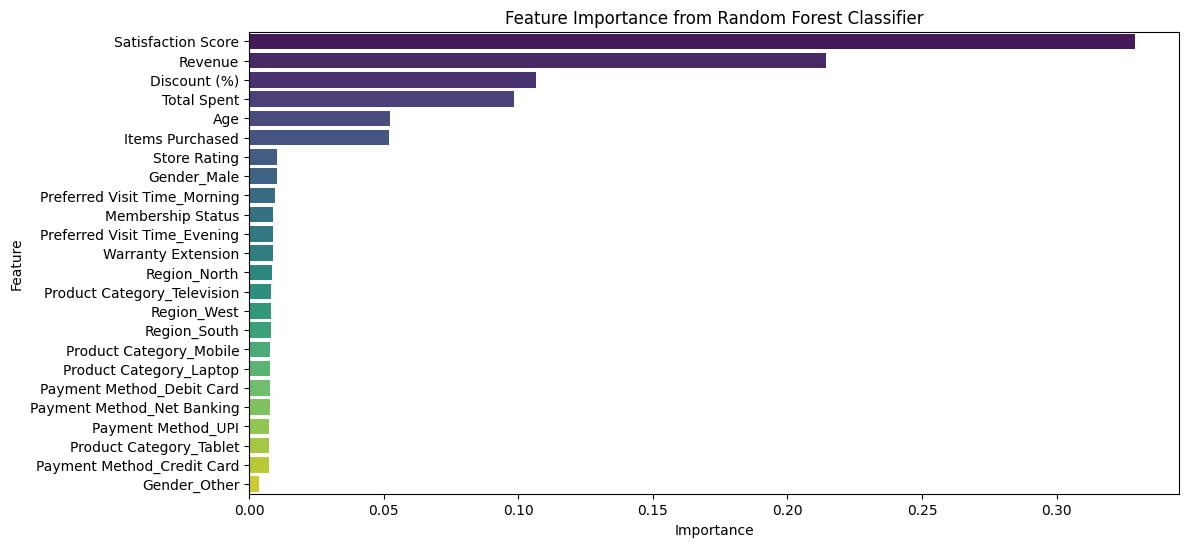

In [183]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X, y)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

print(importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette="viridis")
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the Feature Importance values, the top 10 features for predicting the loyalty category are:

**Top 10 Features:**
1. Satisfaction Score (0.329042)
2. Revenue (0.214376)
3. Discount (%) (0.106497)
4. Total Spent (0.098564)
5. Age (0.052294)
6. Items Purchased (0.052053)
7. Store Rating (0.010523)
8. Gender_Male (0.010252)
9. Preferred Visit Time_Morning (0.009607)
10. Membership Status (0.009023)
**Insights:**
* Satisfaction Score and Revenue are the most important features, highlighting the critical role of customer satisfaction and spending behavior in loyalty prediction.
* Financial features like Discount (%) and Total Spent also rank highly.
* Age and behavioral/demographic features such as Gender and Preferred Visit Time play relatively minor roles but still make the top 10.

### **11.3 RFE**
Recursive Feature Elimination (RFE) is a feature selection technique used to select the most important features by recursively eliminating the least important ones. The goal of RFE is to improve model performance by reducing the number of features, potentially reducing overfitting, and increasing interpretability without losing predictive power.

In [184]:
# RFE using random forest classifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=6)
X_selected = rfe.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)
# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

Selected Features: Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Revenue'],
      dtype='object')


In [198]:
import pickle

# Save the RFE model
with open('rfe_model.pkl', 'wb') as file:
    pickle.dump(rfe, file)

### **11.4 X_selected**

Selected Features (X_selected):
1. Age
2. Items Purchased
3. Total Spent
4. Discount (%)
5. Satisfaction Score
6. Revenue

These features are consistently highlighted by the different feature selection methods and can be considered the most relevant for the model.

## **12. Model Selection and Testing**


**Split the data into training and testing sets**

In [185]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### **Model: Random Forest Classifier**

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (e.g., using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_score}")
print(f"Recall: {recall_score}")
print(f"F1 Score: {f1_score}")
print(f"Confusion Matrix:{confusion_matrix}")

Accuracy: 0.821
Precision: 0.8186870905408641
Recall: 0.821
F1 Score: 0.8190333834755983
Confusion Matrix:[[293   0  32]
 [  0 333  45]
 [ 29  73 195]]


**Performance Metrics:**
1. Accuracy: 0.821

The model correctly predicted 82.1% of all samples. This indicates good overall performance.
2. Precision: 0.8187

Weighted precision across all classes is 81.87%. This means the model has a good ability to avoid false positives.
3. Recall: 0.821

The weighted recall score is 82.1%, indicating the model can correctly identify the majority of the actual classes (avoiding false negatives).
4. F1 Score: 0.8190

The F1 Score balances precision and recall at 81.9%, confirming the model performs consistently well.

**Insights:**
1. **Strengths:**
The model performs well overall, with strong precision, recall, and F1 scores, reflecting good generalization.
Class "Low" and "Medium" have higher prediction accuracy compared to "High."
2. **Challenges:**
There is noticeable confusion between "High" and "Medium." This could indicate overlapping features or insufficient representation of "High" loyalty in the training data.

In [189]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Display the comparison
comparison_df.head(10)

,y_test,y_pred
1501,2,1
2586,2,2
2653,2,2
1055,2,2
705,2,2
106,2,0
589,1,1
2468,2,2
2413,0,0
1600,1,1


In [194]:
correct_predictions = (y_test == y_pred).sum()
print(f"Number of correct predictions: {correct_predictions}")

# Or to see how many predictions were incorrect:
incorrect_predictions = (y_test != y_pred).sum()
print(f"Number of incorrect predictions: {incorrect_predictions}")

Number of correct predictions: 821
Number of incorrect predictions: 179


## **13. Model Tuning**

**The hyperparameters define how the Random Forest operates:**

* n_estimators: Number of trees in the forest.
* max_depth: Maximum depth of each tree (controls overfitting).
* min_samples_split: Minimum samples required to split a node.
* min_samples_leaf: Minimum samples required for a leaf node.
* max_features: Number of features considered when looking for the best split (e.g., square root, logarithm, or all features).
* bootstrap: Whether to use bootstrapping for sampling the dataset.

**GridSearchCV is used to find the best combination of hyperparameters:**
* cv=3: Three-fold cross-validation to split the data into training and validation sets.
* scoring='accuracy': Optimize hyperparameters to maximize classification accuracy.
* verbose=2: Provides detailed logs of the progress.
* n_jobs=-1: Parallel processing for faster computation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: {conf_matrix}")

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.821
Precision: 0.8186870905408641
Recall: 0.821
F1 Score: 0.8190333834755983
Confusion Matrix: [[293   0  32]
 [  0 333  45]
 [ 29  73 195]]


In [201]:
import pickle

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

## **14. Cross Validation**

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)
log_reg_model = LogisticRegression(random_state=42, max_iter=10000)

# Perform 5-fold cross-validation and get accuracy scores for each fold
rf_cv_scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring='accuracy')
svc_cv_scores = cross_val_score(svc_model, X_selected, y, cv=5, scoring='accuracy')
log_reg_cv_scores = cross_val_score(log_reg_model, X_selected, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Random Forest CV Scores: {rf_cv_scores}")
print(f"SVC CV Scores: {svc_cv_scores}")
print(f"Logistic Regression CV Scores: {log_reg_cv_scores}")

# Calculate and print the mean accuracy
print(f"Random Forest Mean Accuracy: {rf_cv_scores.mean()}")
print(f"SVC Mean Accuracy: {svc_cv_scores.mean()}")
print(f"Logistic Regression Mean Accuracy: {log_reg_cv_scores.mean()}")

Random Forest CV Scores: [0.826 0.821 0.827 0.828 0.846]
SVC CV Scores: [0.803 0.789 0.778 0.801 0.786]
Logistic Regression CV Scores: [0.84  0.84  0.823 0.844 0.839]
Random Forest Mean Accuracy: 0.8295999999999999
SVC Mean Accuracy: 0.7914000000000001
Logistic Regression Mean Accuracy: 0.8371999999999999
